In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
# Expected ULs Using b-only model  with PDF = S*mu*fac*S_pdf + B*b_pdf (sample of 100K events)
# Pdf combined for 3 tags
# S_pdf = N1*S1_pdf + N2*S2_pdf + N3*S3_pdf
# fac = 2*lum*CS_ee_BB*[Br_tagD*eff_signal_D+Br_tagDstarGamma*eff_signal_DstarGamma+Br_tagDstarPi0*eff_signal_DstarPi0]

# nbins = 200

dataXps_50 = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], 
        'sigmaMinus2': [7.62011e-08, 8.62084e-08, 1.02079e-07, 1.10923e-07, 1.13879e-07, 1.18168e-07, 1.71138e-07, 1.04558e-07, 6.23693e-08, 3.63372e-08],
        'sigmaPlus2': [2.84064e-07, 3.15195e-07, 3.68115e-07, 3.9958e-07, 4.10056e-07, 4.25021e-07, 6.05394e-07, 3.77999e-07, 2.32867e-07, 1.43866e-07],
        'sigmaMinus1': [1.03431e-07, 1.16398e-07, 1.37685e-07, 1.49535e-07, 1.53513e-07, 1.59367e-07, 2.30228e-07, 1.41094e-07, 8.45634e-08, 4.94242e-08],
        'sigmaPlus1': [2.07019e-07, 2.30884e-07, 2.70942e-07, 2.94273e-07, 3.01992e-07, 3.13181e-07, 4.48747e-07, 2.77983e-07, 1.69345e-07, 1.02316e-07],
        'Median': [1.45825e-07, 1.63143e-07, 1.92588e-07, 2.09208e-07, 2.1474e-07, 2.22739e-07, 3.20837e-07, 1.97425e-07, 1.19184e-07, 7.06023e-08],
        'Limit': [2.64044e-07, 2.34123e-07, 2.85751e-07, 2.48148e-07, 1.70813e-07, 1.37926e-07, 2.09688e-07, 2.03965e-07, 1.39823e-07, 7.01661e-08],
        'mu': [1.33333e-07, 8.67445e-08, 1.16235e-07, 5.07908e-08, -7.14381e-08, -1.60033e-07, -2.09211e-07, 9.42228e-09, 2.57211e-08, 1.48108e-09],
        'sigma':[7.48813e-08, 8.25289e-08, 9.64471e-08, 1.04853e-07, 1.0362e-07, 1.05249e-07, 1.52795e-07, 9.71021e-08, 5.88726e-08, 3.10957e-08]}

# nbins = 50
dataq2_50 = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
        'sigmaMinus2': [7.38505e-08, 8.3872e-08, 9.8286e-08, 1.10358e-07, 1.06089e-07, 1.10674e-07, 1.58998e-07, 7.84596e-08, 5.8217e-08, 3.43482e-08],
        'sigmaPlus2': [2.7375e-07, 3.05472e-07, 3.55091e-07, 3.82907e-07, 3.82071e-07, 3.89204e-07, 5.63108e-07, 3.22125e-07, 2.17321e-07, 1.37505e-07],
        'sigmaMinus1': [1.0008e-07, 1.1327e-07, 1.3272e-07, 1.46896e-07, 1.43113e-07, 1.48024e-07, 2.14019e-07, 1.1105e-07, 7.88258e-08, 4.70675e-08],
        'sigmaPlus1': [1.99713e-07, 2.23919e-07, 2.61224e-07, 2.83392e-07, 2.8139e-07, 2.87599e-07, 4.17259e-07, 2.32936e-07, 1.57906e-07, 9.76541e-08],
        'Median': [1.40752e-07, 1.58732e-07, 1.85675e-07, 2.03172e-07, 2.00097e-07, 2.05534e-07, 2.98209e-07, 1.61181e-07, 1.11035e-07, 6.73192e-08],
        'Limit': [1.62427e-07, 1.39324e-07, 2.01864e-07, 2.05865e-07, 1.5288e-07, 1.40559e-07, 4.48837e-07, 1.62164e-07, 9.85555e-08, 2.50362e-08],
        'mu': [2.87359e-08, -2.63223e-08, 2.36932e-08, 9.80359e-09, -7.88958e-08, -1.16757e-07, 1.88676e-07, -1.30984e-08, -1.76893e-08, -9.41683e-08],
        'sigma':[6.90263e-08, 7.42852e-08, 9.14879e-08, 9.69548e-08, 9.64724e-08, 9.69897e-08, 1.48484e-07, 8.60860e-08, 5.20162e-08, 2.09504e-08]}

# nbins = 180
dataMmin2_50 = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.cd e5, 3.0, 3.5, 4.0, 4.5],
        'sigmaMinus2': [6.8394e-08, 7.88433e-08, 9.18944e-08, 9.21662e-08, 9.32964e-08, 9.35361e-08, 1.442e-07, 8.54976e-08, 5.13761e-08, 2.94192e-08],
        'sigmaPlus2': [2.56559e-07, 2.88986e-07, 3.32531e-07, 3.35264e-07, 3.38355e-07, 3.40086e-07, 5.12737e-07, 3.11458e-07, 1.94463e-07, 1.21354e-07],
        'sigmaMinus1': [9.29823e-08, 1.06689e-07, 1.24015e-07, 1.24455e-07, 1.25839e-07, 1.26188e-07, 1.94246e-07, 1.15473e-07, 6.96987e-08, 4.06718e-08],
        'sigmaPlus1': [1.86626e-07, 2.11643e-07, 2.44469e-07, 2.45989e-07, 2.48534e-07, 2.496e-07, 3.7939e-07, 2.28381e-07, 1.40653e-07, 8.55112e-08],
        'Median': [1.3124e-07, 1.49734e-07, 1.73551e-07, 1.74343e-07, 1.76353e-07, 1.76984e-07, 2.70841e-07, 1.61839e-07, 9.85113e-08, 5.85073e-08],
        'Limit': [1.19373e-07, 1.19829e-07, 1.23367e-07, 2.38506e-07, 2.29094e-07, 2.39968e-07, 2.91541e-07, 1.33884e-07, 9.67027e-08, 4.44837e-08],
        'mu': [-1.07984e-08, -4.75119e-08, -8.77546e-08, 8.28630e-08, 6.72810e-08, 8.02392e-08, 3.03268e-08, -4.49826e-08, -5.77538e-09, -1.61903e-08],
        'sigma':[5.83039e-08, 7.11335e-08, 8.28169e-08, 8.62080e-08, 8.86244e-08, 8.83470e-08, 1.33236e-07, 7.78740e-08, 4.81385e-08, 2.16278e-08]}

# nbins = 250
dataMmax2_50 = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
        'sigmaMinus2': [6.19628e-08, 7.73614e-08, 8.9091e-08, 9.11827e-08, 9.08133e-08, 9.20406e-08, 1.33831e-07, 8.28965e-08, 5.01049e-08, 2.97417e-08],
        'sigmaPlus2': [2.42763e-07, 2.88349e-07, 3.25392e-07, 3.31473e-07, 3.30885e-07, 3.34614e-07, 4.80982e-07, 3.03343e-07, 1.89664e-07, 1.21394e-07],
        'sigmaMinus1': [8.51106e-08, 1.0523e-07, 1.20417e-07, 1.23189e-07, 1.22758e-07, 1.24285e-07, 1.80422e-07, 1.12096e-07, 6.79676e-08, 4.09622e-08],
        'sigmaPlus1': [1.74814e-07, 2.10372e-07, 2.38633e-07, 2.43362e-07, 2.42745e-07, 2.45575e-07, 3.54541e-07, 2.22123e-07, 1.3711e-07, 8.57843e-08],
        'Median': [1.21587e-07, 1.48318e-07, 1.68973e-07, 1.72579e-07, 1.72061e-07, 1.74088e-07, 2.52273e-07, 1.57215e-07, 9.59033e-08, 5.88152e-08],
        'Limit': [8.89551e-08, 9.8147e-08, 1.39915e-07, 2.15066e-07, 2.66881e-07, 2.18628e-07, 2.30561e-07, 1.36196e-07, 1.52355e-07, 4.40075e-08],
        'mu': [-4.94407e-08, -9.11650e-08, -4.75541e-08, 5.54451e-08, 1.13257e-07, 5.81787e-08, -3.43885e-08, -3.28030e-08, 6.49251e-08, -2.00628e-08],
        'sigma':[5.26725e-08, 6.94398e-08, 8.14219e-08, 8.61134e-08, 8.74777e-08, 8.67408e-08, 1.22809e-07, 7.56314e-08, 4.86029e-08, 2.31506e-08]}

# N_bins = 50
dataXps_50_Had = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
        'sigmaMinus2': [1.81524e-07, 2.76377e-07, 2.23622e-07, 2.27968e-07, 2.1981e-07, 2.18031e-07, 3.91544e-07, 2.50106e-07, 1.92476e-07, 1.47829e-07],
        'sigmaPlus2': [9.25727e-07, 1.19966e-06, 1.04986e-06, 1.03588e-06, 1.02853e-06, 1.02442e-06, 1.61379e-06, 1.11461e-06, 9.09985e-07, 7.72658e-07],
        'sigmaMinus1': [2.59047e-07, 3.83103e-07, 3.14259e-07, 3.18351e-07, 3.08414e-07, 3.06095e-07, 5.3868e-07, 3.48243e-07, 2.70391e-07, 2.11986e-07],
        'sigmaPlus1': [6.11576e-07, 8.2909e-07, 7.09114e-07, 7.05595e-07, 6.95054e-07, 6.90978e-07, 1.13516e-06, 7.64659e-07, 6.12322e-07, 5.05886e-07],
        'Median': [3.92693e-07, 5.58042e-07, 4.66444e-07, 4.6858e-07, 4.57516e-07, 4.54341e-07, 7.75793e-07, 5.10671e-07, 4.01745e-07, 3.22588e-07],
        'Limit': [3.64087e-07, 4.93889e-07, 3.68933e-07, 3.29349e-07, 7.37809e-07, 3.10135e-07, 1.66251e-06, 4.34004e-07, 4.47837e-07, 4.51563e-07],
        'mu': [2.31188e-17, -8.61083e-08, 2.11164e-19, -1.00000e-07, 2.9627e-07, 4.10783e-21, 8.89085e-07, 8.90399e-20, 5.46679e-08, 1.18627e-07],
        'sigma':[3.81386e-07, 1.37198e-06, 1.67962e-07, 1.41209e+01, 2.14877e-07, 8.54833e-08, 4.13418e-07, 1.82427e-07, 1.58e-07, 1.42708e-07]}


# N_bins = 50
dataq2_50_Had = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
        'sigmaMinus2': [3.1836e-07, 3.47277e-07, 4.1798e-07, 4.44904e-07, 4.36793e-07, 4.471e-07, 6.68459e-07, 3.82708e-07, 2.37953e-07, 1.7011e-07],
        'sigmaPlus2': [1.38012e-06, 1.48053e-06, 1.67794e-06, 1.77056e-06, 1.74444e-06, 1.78012e-06, 2.49637e-06, 1.55829e-06, 1.0779e-06, 8.34157e-07],
        'sigmaMinus1': [4.42362e-07, 4.82927e-07, 5.72713e-07, 6.08786e-07, 5.97952e-07, 6.11769e-07, 9.06046e-07, 5.25383e-07, 3.32225e-07, 2.40321e-07],
        'sigmaPlus1': [9.57885e-07, 1.03536e-06, 1.19015e-06, 1.25941e-06, 1.23942e-06, 1.26596e-06, 1.81392e-06, 1.10007e-06, 7.35457e-07, 5.55003e-07],
        'Median': [6.4535e-07, 7.02232e-07, 8.1969e-07, 8.69679e-07, 8.54941e-07, 8.74012e-07, 1.27633e-06, 7.54522e-07, 4.88868e-07, 3.60262e-07],
        'Limit': [8.47171e-07, 7.83065e-07, 7.74599e-07, 7.16661e-07, 5.66681e-07, 7.11379e-07, 1.67256e-06, 1.12225e-06, 6.44966e-07, 2.88496e-07],
        'mu': [2.36678e-07, 8.93131e-08, 1.1714e-18, 2.13163e-20, 2.22045e-22, 1.07692e-20, 4.8832e-07, 4.35105e-07, 1.73003e-07, 1.11022e-21],
        'sigma':[2.85617e-07, 2.92581e-07, 1.39735e-06, 3.59017e-07, 1.56823e-07, 3.23021e-07, 6.16595e-07, 3.50230e-07, 2.20491e-07, 1.08323e-07]}



## Rotating the distributions, limiting the region with an ellipse where the 99% of data is within the region

In [3]:
# nbins = 150x150 using Mmin and Mmax
data2D_50 = {'Mass': [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], 
        'sigmaMinus2': [6.47796e-08, 6.8736e-08, 7.15463e-08, 7.04456e-08, 7.08167e-08, 7.078e-08, 1.13668e-07, 6.85812e-08, 4.17158e-08, 2.58203e-08],
        'sigmaPlus2': [2.47521e-07, 2.61653e-07, 2.72311e-07, 2.68812e-07, 2.70847e-07, 2.71247e-07, 4.16165e-07, 2.61587e-07, 1.67936e-07, 1.13885e-07],
        'sigmaMinus1': [8.81494e-08, 9.35507e-08, 9.73423e-08, 9.58179e-08, 9.63768e-08, 9.63761e-08, 1.53736e-07, 9.34324e-08, 5.72331e-08, 3.60205e-08],
        'sigmaPlus1': [1.78747e-07, 1.89239e-07, 1.96959e-07, 1.94247e-07, 1.95625e-07, 1.95847e-07, 3.0491e-07, 1.89217e-07, 1.19287e-07, 7.86657e-08],
        'Median': [1.24955e-07, 1.32402e-07, 1.37822e-07, 1.35766e-07, 1.36685e-07, 1.36766e-07, 2.15793e-07, 1.32335e-07, 8.21325e-08, 5.27531e-08],
        'Limit': [2.06291e-07, 2.40854e-07, 3.00403e-07, 3.09685e-07, 1.66732e-07, 1.24471e-07, 1.52252e-07, 1.46203e-07, 1.15109e-07, 4.05278e-08]}



In [4]:
# nbins = 250
dataBDT_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [6.33032e-08, 8.59156e-08, 8.11008e-08, 1.33998e-07, 4.68678e-08, 2.79815e-08],
        'sigmaPlus2': [2.41956e-07, 3.13098e-07, 2.98118e-07, 4.64569e-07, 1.80555e-07, 1.14722e-07],
        'sigmaMinus1': [8.63878e-08, 1.16127e-07, 1.09617e-07, 1.80501e-07, 6.36627e-08, 3.81996e-08],
        'sigmaPlus1': [1.82184e-07, 2.30042e-07, 2.1804e-07, 3.48119e-07, 1.3007e-07, 8.0778e-08],
        'Median': [1.22379e-07, 1.62934e-07, 1.5411e-07, 2.5142e-07, 9.05754e-08, 5.51875e-08],
        'Limit': [2.08976e-07, 1.74328e-07, 2.21605e-07, 2.21862e-07, 1.70557e-07, 5.35051e-08],
        'mu': [9.38247e-08, 1.40104e-08, 8.31697e-08, -4.68649e-08, 8.61557e-08, -3.37425e-09],
        'sigma':[6.52798e-08, 8.14778e-08, 7.73371e-08, 1.24267e-07, 4.80586e-08, 2.48225e-08]}

# nbins = 100
dataBDT_50_Had = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [1.88643e-07, 1.81567e-07, 1.59513e-07, 2.61716e-07, 1.26169e-07, 9.38406e-08],
        'sigmaPlus2': [9.42607e-07, 9.43039e-07, 8.80896e-07, 1.27089e-06, 7.21527e-07, 5.99768e-07],
        'sigmaMinus1': [2.69527e-07, 2.63344e-07, 2.35227e-07, 3.78952e-07, 1.8511e-07, 1.40216e-07],
        'sigmaPlus1': [6.28366e-07, 6.25703e-07, 5.77091e-07, 8.67561e-07, 4.63688e-07, 3.72142e-07],
        'Median': [4.06794e-07, 4.02022e-07, 3.65102e-07, 5.70839e-07, 2.89089e-07, 2.24239e-07],
        'Limit': [3.65569e-07, 4.01129e-07, 5.79962e-07, 3.6879e-07, 3.24933e-07, 1.60805e-07],
        'mu': [-7.70693e-09, -3.56149e-08, 1.87811e-07, -3.59981e-07, 3.09056e-08, 2.17585e-15],
        'sigma':[1.54783e-07, 1.39428e-07, 1.78643e-07, 2.25312e-07, 1.06480e-07, 3.49261e-08]}

In [5]:
# ULs without redicing 40% the noise 
# N_bins = 200
dataXps_50_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [8.35339e-08, 1.08721e-07, 1.19589e-07, 2.14001e-07, 7.09111e-08, 4.11507e-08],
        'sigmaPlus2': [3.10523e-07, 3.91583e-07, 4.30149e-07, 7.533e-07, 2.62766e-07, 1.60866e-07],
        'sigmaMinus1': [1.13534e-07, 1.46736e-07, 1.61234e-07, 2.87753e-07, 9.61135e-08, 5.60441e-08],
        'sigmaPlus1': [2.26844e-07, 2.88453e-07, 3.16869e-07, 5.59325e-07, 1.91677e-07, 1.15058e-07],
        'Median': [1.59976e-07, 2.05138e-07, 2.25427e-07, 4.0043e-07, 1.35205e-07, 7.9785e-08],
        'Limit': [1.80071e-07, 2.12955e-07, 1.64611e-07, 3.77849e-07, 2.36809e-07, 7.33137e-08],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [8.23808e-08, 1.05003e-07, 1.10836e-07, 1.98292e-07, 6.62286e-08, 3.93273e-08],
        'sigmaPlus2': [3.0244e-07, 3.78451e-07, 3.99245e-07, 6.9867e-07, 2.45109e-07, 1.54552e-07],
        'sigmaMinus1': [1.11335e-07, 1.4169e-07, 1.49624e-07, 2.66689e-07, 8.95164e-08, 5.36691e-08],
        'sigmaPlus1': [2.21251e-07, 2.78688e-07, 2.94102e-07, 5.18562e-07, 1.78601e-07, 1.10388e-07],
        'Median': [1.56453e-07, 1.9821e-07, 2.09182e-07, 3.71158e-07, 1.25946e-07, 7.65303e-08],
        'Limit': [1.54042e-07, 2.40105e-07, 2.14554e-07, 2.25705e-07, 1.54264e-07, 7.5222e-08],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# N_bins = 50
dataXps_50_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [2.2365e-07, 2.10872e-07, 2.30385e-07, 4.52442e-07, 2.19702e-07, 1.5477e-07],
        'sigmaPlus2': [1.0635e-06, 1.0073e-06, 1.06665e-06, 1.8267e-06, 9.99847e-07, 7.96993e-07],
        'sigmaMinus1': [3.15238e-07, 2.97131e-07, 3.22866e-07, 6.2051e-07, 3.06734e-07, 2.20999e-07],
        'sigmaPlus1': [7.16528e-07, 6.76957e-07, 7.23229e-07, 1.29368e-06, 6.80678e-07, 5.23708e-07],
        'Median': [4.6948e-07, 4.42891e-07, 4.7776e-07, 8.89528e-07, 4.51776e-07, 3.35238e-07],
        'Limit': [2.56689e-07, 5.88514e-07, 3.83133e-07, 1.18143e-06, 3.30862e-07, 3.48332e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [3.5262e-07, 4.37775e-07, 4.63767e-07, 7.9749e-07, 2.66765e-07, 1.73678e-07],
        'sigmaPlus2': [1.48078e-06, 1.74799e-06, 1.84435e-06, 2.93861e-06, 1.17816e-06, 8.51248e-07],
        'sigmaMinus1': [4.86899e-07, 5.99351e-07, 6.34556e-07, 1.07875e-06, 3.7119e-07, 2.45945e-07],
        'sigmaPlus1': [1.03631e-06, 1.24227e-06, 1.31257e-06, 2.14536e-06, 8.104e-07, 5.67117e-07],
        'Median': [7.04524e-07, 8.56957e-07, 9.06591e-07, 1.51555e-06, 5.42807e-07, 3.68526e-07],
        'Limit': [9.12212e-07, 7.03435e-07, 5.23132e-07, 1.38516e-06, 3.03774e-07, 4.52301e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

In [6]:
# Expected ULs Using b-only model  with PDF = S*mu*fac*S_pdf + B*b_pdf (sample of 100K events)
# Pdf combined for 3 tags
# S_pdf = N1*S1_pdf + N2*S2_pdf + N3*S3_pdf
# fac = 2*lum*CS_ee_BB*[Br_tagD*eff_signal_D+Br_tagDstarGamma*eff_signal_DstarGamma+Br_tagDstarPi0*eff_signal_DstarPi0]
# N_bins = 30
dataXps_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [1.17127e-06, 1.42216e-06, 1.58585e-06, 2.22865e-06, 1.03581e-06, 8.32607e-07],
        'sigmaPlus2': [6.45758e-06, 7.15885e-06, 7.75707e-06, 9.62304e-06, 6.06589e-06, 5.65818e-06],
        'sigmaMinus1': [1.69521e-06, 2.01486e-06, 2.2423e-06, 3.07832e-06, 1.51135e-06, 1.25484e-06],
        'sigmaPlus1': [4.16649e-06, 4.72329e-06, 5.16838e-06, 6.64169e-06, 3.84152e-06, 3.45275e-06],
        'Median': [2.6176e-06, 3.04239e-06, 3.35634e-06, 4.47428e-06, 2.36813e-06, 2.04096e-06],
        'Limit': [1.868e-06, 2.62266e-06, 2.95578e-06, 5.58148e-06, 3.078e-06, 1.55101e-06],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# N_bins = 10
dataq2_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [1.19108e-06, 1.40463e-06, 1.51201e-06, 2.39421e-06, 1.33441e-06, 8.81336e-07],
        'sigmaPlus2': [6.47614e-06, 7.15023e-06, 7.65967e-06, 1.01216e-05, 6.99612e-06, 5.78071e-06],
        'sigmaMinus1': [1.72087e-06, 1.9945e-06, 2.1465e-06, 3.29814e-06, 1.91082e-06, 1.31305e-06],
        'sigmaPlus1': [4.19723e-06, 4.69906e-06, 4.54909e-06, 7.03126e-06, 4.56673e-06, 3.55283e-06],
        'Median': [2.64821e-06, 3.01706e-06, 3.24508e-06, 4.76675e-06, 2.90956e-06, 2.11848e-06],
        'Limit': [3.06818e-06, 3.74149e-06, 6.40841e-06, 3.26868e-06, 3.31235e-06, 1.55101e-06],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# For Hadronic tag using 362/fb was necesary not apply the reduction of 40% in K0L and neutrons
# N_bins = 5

dataXps_362_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [1.87992e-05, 1.88312e-05, 1.97037e-05, 1.14043e-05, 4.31865e-06, 1.54653e-05],
        'sigmaPlus2': [9.69443e-05, 9.70299e-05, 0.000100172, 1.71701e-05, 6.15477e-05, 8.03689e-05],
        'sigmaMinus1': [2.65907e-05, 2.66355e-05, 2.78271e-05, 4.72061e-05, 8.43335e-06, 2.11078e-05],
        'sigmaPlus1': [6.29852e-05, 6.30645e-05, 6.54268e-05, 2.79137e-05, 3.38612e-05, 4.56303e-05],
        'Median': [4.017e-05, 4.02306e-05, 4.19111e-05, 2.79137e-05, 1.70757e-05, 3.16492e-05],
        'Limit': [7.0926e-05, 7.0359e-05, 7.01827e-05, 2.11626e-05, 1.69508e-05, 2.31412e-05],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

dataq2_362_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [2.02811e-05, 2.02386e-05, 4.27643e-05, 1.38733e-05, 1.4104e-05, 1.5217e-05],
        'sigmaPlus2': [0.000100365, 0.000100117, 0.000100943, 8.34775e-05, 8.47479e-05, 8.69237e-05],
        'sigmaMinus1': [2.84332e-05, 2.83724e-05, 2.86147e-05, 2.03216e-05, 2.06211e-05, 2.201e-05],
        'sigmaPlus1': [6.58591e-05, 6.57035e-05, 6.62603e-05, 5.23064e-05, 5.31049e-05, 5.51355e-05],
        'Median': [4.24813e-05, 4.2381e-05, 4.27643e-05, 3.19739e-05, 3.24714e-05, 3.4172e-05],
        'Limit': [4.38737e-05, 4.35576e-05, 4.35468e-05, 2.29075e-05, 2.3316e-05, 4.59804e-05],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


'''dataMmin_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [3.7929e-06, 3.64259e-06, 1.85462e-06, 1.61777e-06, 1.52869e-06, 1.63621e-06],
        'sigmaPlus2': [1.48067e-05, 1.45696e-05, 8.64999e-06, 7.71819e-06, 7.70106e-06, 8.2607e-06],
        'sigmaMinus1': [5.1693e-06, 4.98783e-06, 2.59992e-06, 2.27513e-06, 2.17113e-06, 2.32484e-06],
        'sigmaPlus1': [1.05846e-05, 1.03482e-05, 5.84234e-06, 5.17573e-06, 4.58566e-06, 5.44767e-06],
        'Median': [7.34961e-06, 7.1351e-06, 3.84936e-06, 3.38722e-06, 3.27619e-06, 3.50684e-06],
        'Limit': [1.61372e-05, 1.44476e-05, 3.35123e-06, 2.10517e-06, 3.04028e-06, 2.25849e-06],
        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}

dataMmax_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],
        'sigmaMinus2': [3.7727e-06, 3.8895e-06, 1.88908e-06, 1.45268e-06, 1.41478e-06, 1.54194e-06],
        'sigmaPlus2': [1.48363e-05, 1.49463e-05, 8.66537e-06, 7.31792e-06, 7.28635e-06, 7.89317e-06],
        'sigmaMinus1': [5.15146e-06, 5.28745e-06, 2.64217e-06, 2.06603e-06, 2.017e-06, 2.19527e-06],
        'sigmaPlus1': [1.05907e-05, 1.07315e-05, 5.88691e-06, 4.83934e-06, 4.77856e-06, 5.1836e-06],
        'Median': [7.3393e-06, 7.48696e-06, 3.89824e-06, 3.11836e-06, 3.05803e-06, 3.32293e-06],
        'Limit': [1.24192e-05, 1.09304e-05, 2.96105e-06, 2.06908e-06, 3.31062e-06, 2.69191e-06],
        'eff': [0.61492, 0.62269, 0.62426, 0.6211, 0.57715, 0.47099]}'''


"dataMmin_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],\n        'sigmaMinus2': [3.7929e-06, 3.64259e-06, 1.85462e-06, 1.61777e-06, 1.52869e-06, 1.63621e-06],\n        'sigmaPlus2': [1.48067e-05, 1.45696e-05, 8.64999e-06, 7.71819e-06, 7.70106e-06, 8.2607e-06],\n        'sigmaMinus1': [5.1693e-06, 4.98783e-06, 2.59992e-06, 2.27513e-06, 2.17113e-06, 2.32484e-06],\n        'sigmaPlus1': [1.05846e-05, 1.03482e-05, 5.84234e-06, 5.17573e-06, 4.58566e-06, 5.44767e-06],\n        'Median': [7.34961e-06, 7.1351e-06, 3.84936e-06, 3.38722e-06, 3.27619e-06, 3.50684e-06],\n        'Limit': [1.61372e-05, 1.44476e-05, 3.35123e-06, 2.10517e-06, 3.04028e-06, 2.25849e-06],\n        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}\n\ndataMmax_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 4.5],\n        'sigmaMinus2': [3.7727e-06, 3.8895e-06, 1.88908e-06, 1.45268e-06, 1.41478e-06, 1.54194e-06],\n        'sigmaPlus2': [1.48363e-05, 1.49463e-05, 8.66537e-06, 7.31792e-06, 7.28635e-06, 7.89317e-06],\n   

In [7]:

dataXps_50_df = pd.DataFrame(dataXps_50)
dataq2_50_df = pd.DataFrame(dataq2_50)
dataMmin2_50_df = pd.DataFrame(dataMmin2_50)
dataMmax2_50_df = pd.DataFrame(dataMmax2_50)
data2D_50_df = pd.DataFrame(data2D_50)


dataXps_50_Had_df = pd.DataFrame(dataXps_50_Had)
dataq2_50_Had_df = pd.DataFrame(dataq2_50_Had)

dataBDT_50_df = pd.DataFrame(dataBDT_50)
dataBDT_50_Had_df = pd.DataFrame(dataBDT_50_Had)

dataXps_362_df = pd.DataFrame(dataBDT_50)
dataq2_362_df = pd.DataFrame(dataq2_362)

dataXps_50_NoRed_df = pd.DataFrame(dataXps_50_NoRed)
dataq2_50_NoRed_df = pd.DataFrame(dataq2_50_NoRed)
dataXps_50_NoRed_Had_df = pd.DataFrame(dataXps_50_Had_NoRed)
dataq2_50_NoRed_Had_df = pd.DataFrame(dataq2_50_Had_NoRed)

dataXps_362_Had_NoRed_df = pd.DataFrame(dataXps_362_Had_NoRed)
dataq2_362_Had_NoRed_df = pd.DataFrame(dataq2_362_Had_NoRed)

In [8]:
dataXps_50_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma
0,0.0,7.620110e-08,2.840640e-07,1.034310e-07,2.070190e-07,1.458250e-07,2.640440e-07,1.333330e-07,7.488130e-08
1,0.5,8.620840e-08,3.151950e-07,1.163980e-07,2.308840e-07,1.631430e-07,2.341230e-07,8.674450e-08,8.252890e-08
2,1.0,1.020790e-07,3.681150e-07,1.376850e-07,2.709420e-07,1.925880e-07,2.857510e-07,1.162350e-07,9.644710e-08
3,1.5,1.109230e-07,3.995800e-07,1.495350e-07,2.942730e-07,2.092080e-07,2.481480e-07,5.079080e-08,1.048530e-07
4,2.0,1.138790e-07,4.100560e-07,1.535130e-07,3.019920e-07,2.147400e-07,1.708130e-07,-7.143810e-08,1.036200e-07
5,2.5,1.181680e-07,4.250210e-07,1.593670e-07,3.131810e-07,2.227390e-07,1.379260e-07,-1.600330e-07,1.052490e-07
6,3.0,1.711380e-07,6.053940e-07,2.302280e-07,4.487470e-07,3.208370e-07,2.096880e-07,-2.092110e-07,1.527950e-07
7,3.5,1.045580e-07,3.779990e-07,1.410940e-07,2.779830e-07,1.974250e-07,2.039650e-07,9.422280e-09,9.710210e-08
8,4.0,6.236930e-08,2.328670e-07,8.456340e-08,1.693450e-07,1.191840e-07,1.398230e-07,2.572110e-08,5.887260e-08
9,4.5,3.633720e-08,1.438660e-07,4.942420e-08,1.023160e-07,7.060230e-08,7.016610e-08,1.481080e-09,3.109570e-08


In [9]:
dataq2_50_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma
0,0.0,7.385050e-08,2.737500e-07,1.000800e-07,1.997130e-07,1.407520e-07,1.624270e-07,2.873590e-08,6.902630e-08
1,0.5,8.387200e-08,3.054720e-07,1.132700e-07,2.239190e-07,1.587320e-07,1.393240e-07,-2.632230e-08,7.428520e-08
2,1.0,9.828600e-08,3.550910e-07,1.327200e-07,2.612240e-07,1.856750e-07,2.018640e-07,2.369320e-08,9.148790e-08
3,1.5,1.103580e-07,3.829070e-07,1.468960e-07,2.833920e-07,2.031720e-07,2.058650e-07,9.803590e-09,9.695480e-08
4,2.0,1.060890e-07,3.820710e-07,1.431130e-07,2.813900e-07,2.000970e-07,1.528800e-07,-7.889580e-08,9.647240e-08
5,2.5,1.106740e-07,3.892040e-07,1.480240e-07,2.875990e-07,2.055340e-07,1.405590e-07,-1.167570e-07,9.698970e-08
6,3.0,1.589980e-07,5.631080e-07,2.140190e-07,4.172590e-07,2.982090e-07,4.488370e-07,1.886760e-07,1.484840e-07
7,3.5,7.845960e-08,3.221250e-07,1.110500e-07,2.329360e-07,1.611810e-07,1.621640e-07,-1.309840e-08,8.608600e-08
8,4.0,5.821700e-08,2.173210e-07,7.882580e-08,1.579060e-07,1.110350e-07,9.855550e-08,-1.768930e-08,5.201620e-08
9,4.5,3.434820e-08,1.375050e-07,4.706750e-08,9.765410e-08,6.731920e-08,2.503620e-08,-9.416830e-08,2.095040e-08


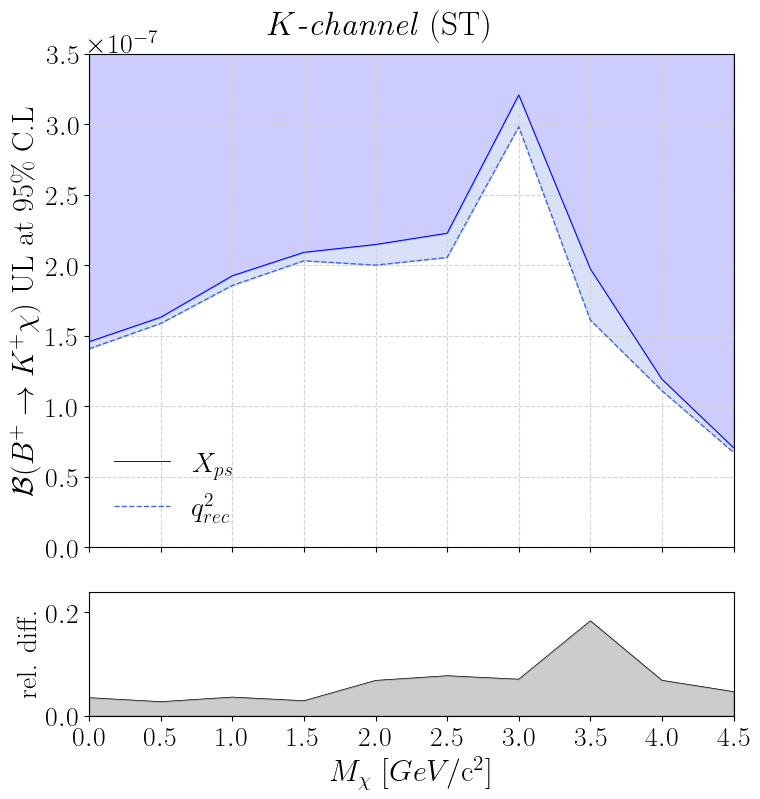

In [87]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
difference = (dataXps_50_df.Median - dataq2_50_df.Median) / dataXps_50_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_df.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='royalblue', mec='darkorange', label='$q^2_{rec}$')
ax1.fill_between(x, dataq2_50_df.Median, dataXps_50_df.Median, color='royalblue', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(dataXps_50_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(dataXps_50_df.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_1.png', dpi=300,  bbox_inches='tight')
plt.show()

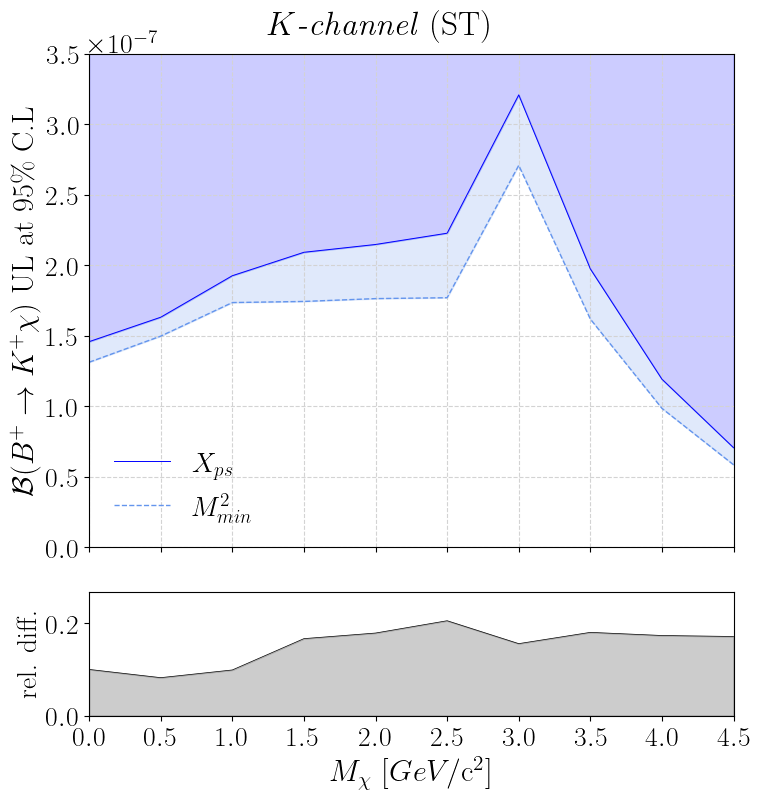

In [88]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
difference = (dataXps_50_df.Median - dataMmin2_50_df.Median) / dataXps_50_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_df.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataMmin2_50_df.Mass, dataMmin2_50_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
ax1.fill_between(x, dataMmin2_50_df.Median, dataXps_50_df.Median, color='cornflowerblue', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(dataXps_50_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(dataXps_50_df.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_2.png', dpi=300,  bbox_inches='tight')
plt.show()

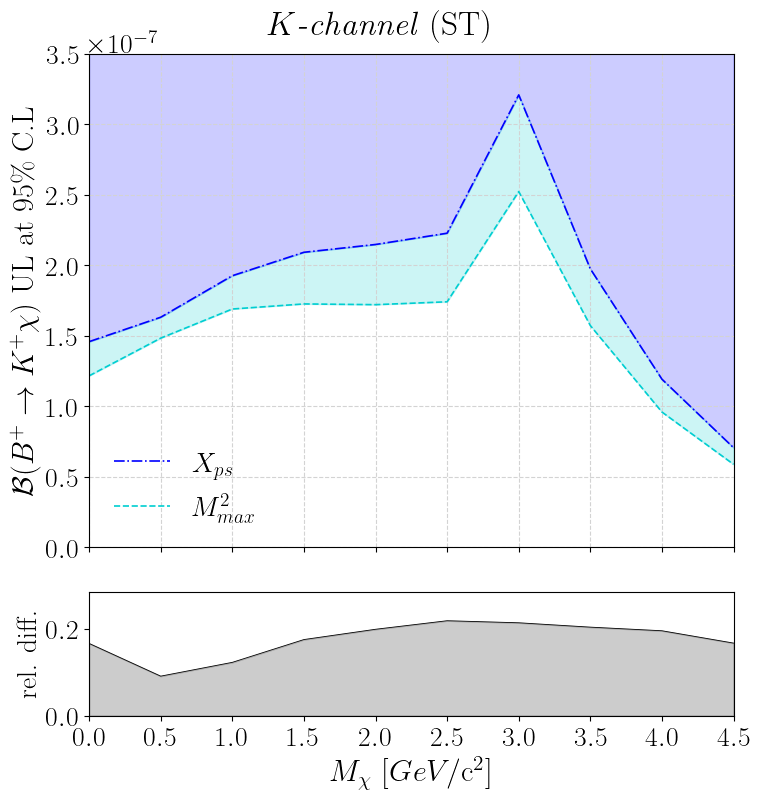

In [89]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
difference = (dataXps_50_df.Median - dataMmax2_50_df.Median) / dataXps_50_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, linestyle='dashdot', lw=1.2, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_df.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataMmax2_50_df.Mass, dataMmax2_50_df.Median, linestyle='dashed', lw=1.2, ms=6, mew=1, color='darkturquoise', mec='darkorange', label='$M^2_{max}$')
ax1.fill_between(x, dataMmax2_50_df.Median, dataXps_50_df.Median, color='darkturquoise', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(dataXps_50_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(dataXps_50_df.Mass, difference, color='black', linestyle='-', linewidth=0.6)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_3.png', dpi=300,  bbox_inches='tight')
plt.show()

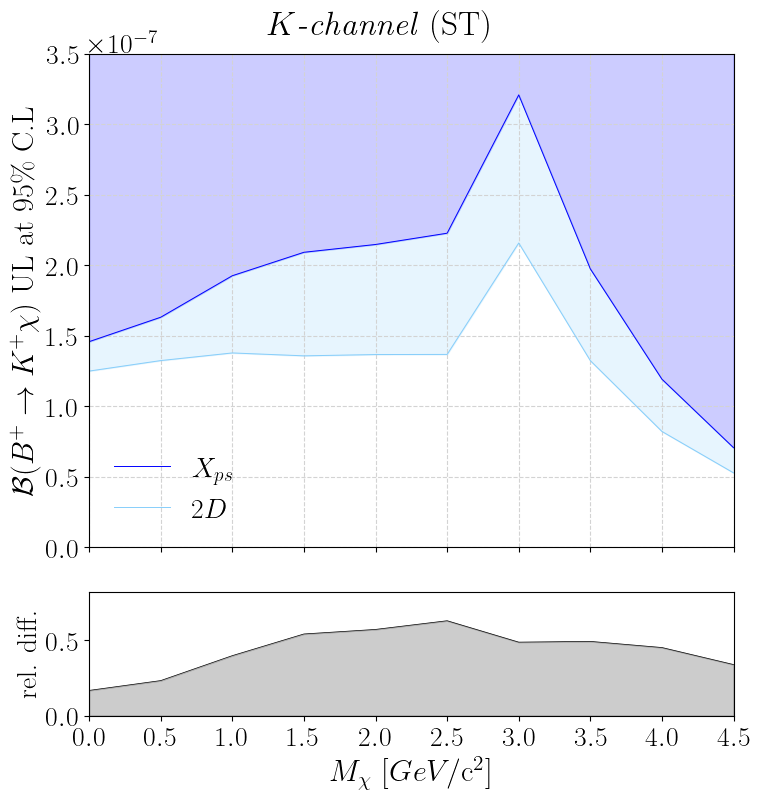

In [90]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
difference = (dataXps_50_df.Median - data2D_50_df.Median) / data2D_50_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_df.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(data2D_50_df.Mass, data2D_50_df.Median, linestyle='-', lw=0.7, ms=6, mew=1, color='lightskyblue', mec='darkorange', label='$2D$')
ax1.fill_between(x, data2D_50_df.Median, dataXps_50_df.Median, color='lightskyblue', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(dataXps_50_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(dataXps_50_df.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_4.png', dpi=300,  bbox_inches='tight')
plt.show()

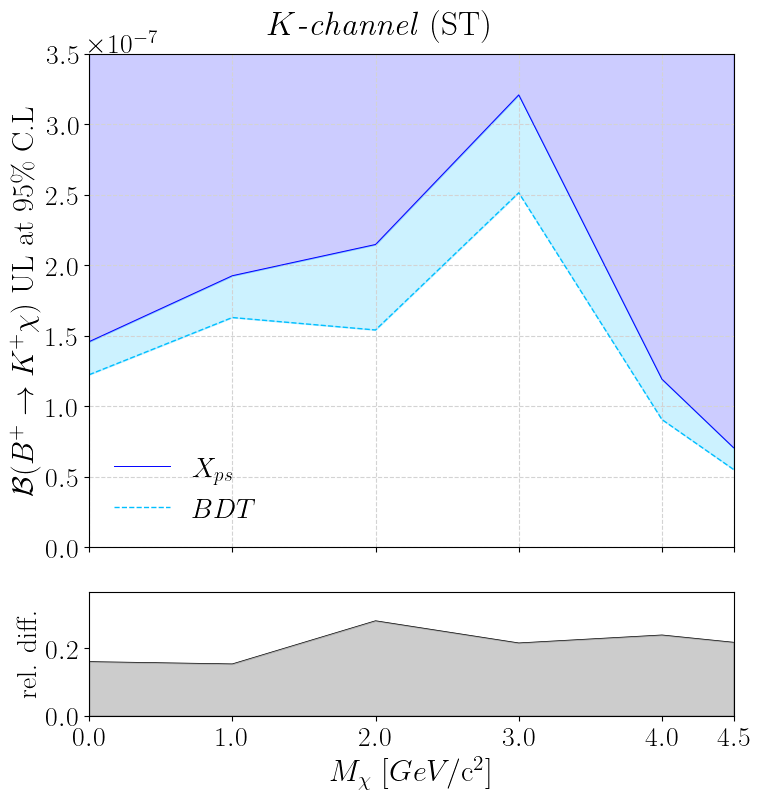

In [91]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values

# Selecting especific columns
selected_rows = dataXps_50_df.loc[::2]
final_row = dataXps_50_df.iloc[[-1]]
# Select the final odd row and add it as the final column to the selected rows DataFrame
selected_rows = pd.concat([selected_rows, final_row], ignore_index=True)
x = selected_rows.Mass 

# Calculate the difference between the two sets
difference = (selected_rows.Median - dataBDT_50_df.Median) / selected_rows.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(selected_rows.Mass, selected_rows.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, selected_rows.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataBDT_50_df.Mass, dataBDT_50_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='deepskyblue', mec='darkorange', label='$BDT$')
ax1.fill_between(x, dataBDT_50_df.Median, selected_rows.Median, color='deepskyblue', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(selected_rows.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_5.png', dpi=300,  bbox_inches='tight')
plt.show()

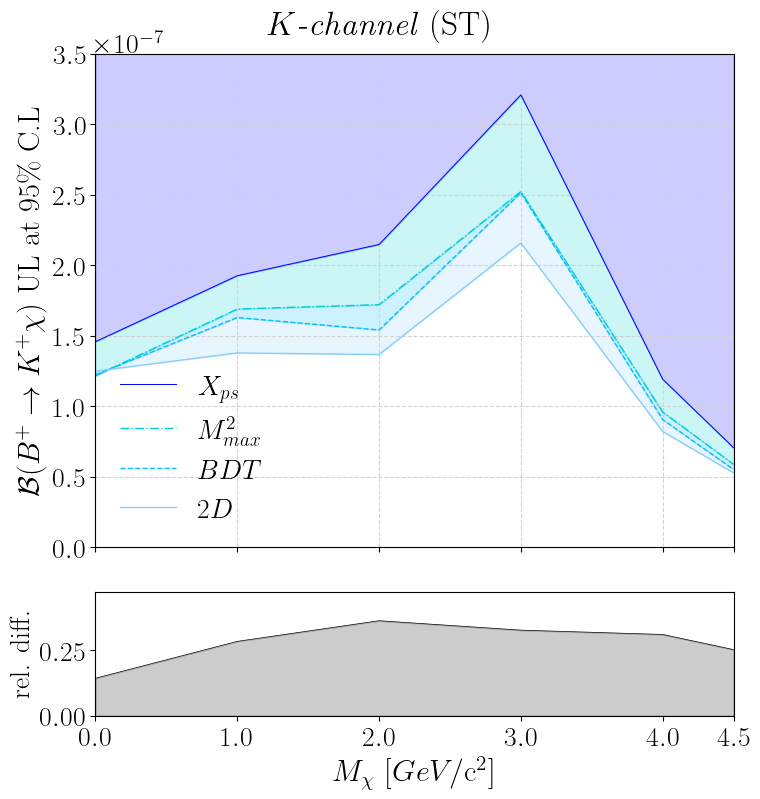

In [92]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values

# Selecting especific columns
selected_rows_Xps = dataXps_50_df.loc[::2]
final_row_Xps = dataXps_50_df.iloc[[-1]]

selected_rows_Mmin = dataMmin2_50_df.loc[::2]
final_row_Mmin = dataMmin2_50_df.iloc[[-1]]

selected_rows_Mmax = dataMmax2_50_df.loc[::2]
final_row_Mmax = dataMmax2_50_df.iloc[[-1]]

selected_rows_2D = data2D_50_df.loc[::2]
final_row_2D = data2D_50_df.iloc[[-1]]
# Select the final odd row and add it as the final column to the selected rows DataFrame
selected_rows_Xps = pd.concat([selected_rows_Xps, final_row_Xps], ignore_index=True)
selected_rows_Mmin = pd.concat([selected_rows_Mmin, final_row_Mmin], ignore_index=True)
selected_rows_Mmax = pd.concat([selected_rows_Mmax, final_row_Mmax], ignore_index=True)
selected_rows_2D = pd.concat([selected_rows_2D, final_row_2D], ignore_index=True)

x = selected_rows_Xps.Mass 

# Calculate the difference between the two sets
difference = (selected_rows_Xps.Median - selected_rows_2D.Median) / selected_rows_Xps.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(selected_rows_Xps.Mass, selected_rows_Xps.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, selected_rows_Xps.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
#ax1.plot(selected_rows_Mmin.Mass, selected_rows_Mmin.Median, linestyle='dashed', lw=0.7, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
#ax1.fill_between(x, selected_rows_Mmin.Median, selected_rows_Xps.Median, color='cornflowerblue', alpha=0.2)

ax1.plot(selected_rows_Mmax.Mass, selected_rows_Mmax.Median, linestyle='-.', lw=1, ms=6, mew=1, color='darkturquoise', mec='darkorange', label='$M^2_{max}$')
ax1.fill_between(x, selected_rows_Mmax.Median, selected_rows_Xps.Median, color='darkturquoise', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataBDT_50_df.Mass, dataBDT_50_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='deepskyblue', mec='darkorange', label='$BDT$')
ax1.fill_between(x, dataBDT_50_df.Median, selected_rows_Mmax.Median, color='deepskyblue', alpha=0.2)

ax1.plot(selected_rows_2D.Mass, selected_rows_2D.Median, linestyle='-', lw=1, ms=6, mew=1, color='lightskyblue', mec='darkorange', label='$2D$')
ax1.fill_between(x, selected_rows_2D.Median, dataBDT_50_df.Median, color='lightskyblue', alpha=0.2)




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(selected_rows.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_6.png', dpi=300,  bbox_inches='tight')
plt.show()

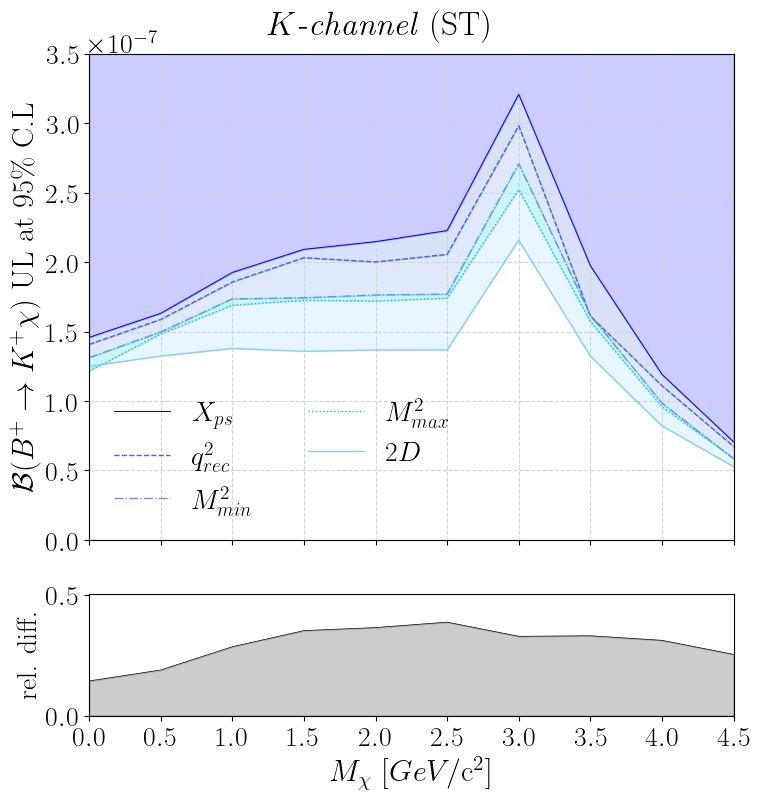

In [93]:
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values


x = dataXps_50_df.Mass 

# Calculate the difference between the two sets
difference = (dataXps_50_df.Median - data2D_50_df.Median) / dataXps_50_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, linestyle='-', lw=0.7, ms=6, mew=1, mec='blue', color='blue', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_df.Median, 3.5E-7, color='blue', alpha=0.2)

# Plot the second set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='royalblue', mec='darkorange', label='$q^2_{rec}$')
ax1.fill_between(x, dataq2_50_df.Median, dataXps_50_df.Median, color='royalblue', alpha=0.2)

ax1.plot(dataMmin2_50_df.Mass, dataMmin2_50_df.Median, linestyle='-.', lw=1, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
ax1.fill_between(x, dataMmin2_50_df.Median, dataq2_50_df.Median, color='cornflowerblue', alpha=0.2)

ax1.plot(dataMmax2_50_df.Mass, dataMmax2_50_df.Median, linestyle=':', lw=1, ms=6, mew=1, color='darkturquoise', mec='darkorange', label='$M^2_{max}$')
ax1.fill_between(x, dataMmax2_50_df.Median, dataMmin2_50_df.Median, color='darkturquoise', alpha=0.2)

ax1.plot(data2D_50_df.Mass, data2D_50_df.Median, linestyle='-', lw=1, ms=6, mew=1, color='lightskyblue', mec='darkorange', label='$2D$')
ax1.fill_between(x, data2D_50_df.Median, dataMmax2_50_df.Median, color='lightskyblue', alpha=0.2)




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False, loc='lower left', ncol=2)  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 3.5E-7)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(x, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL_7.png', dpi=300,  bbox_inches='tight')
plt.show()

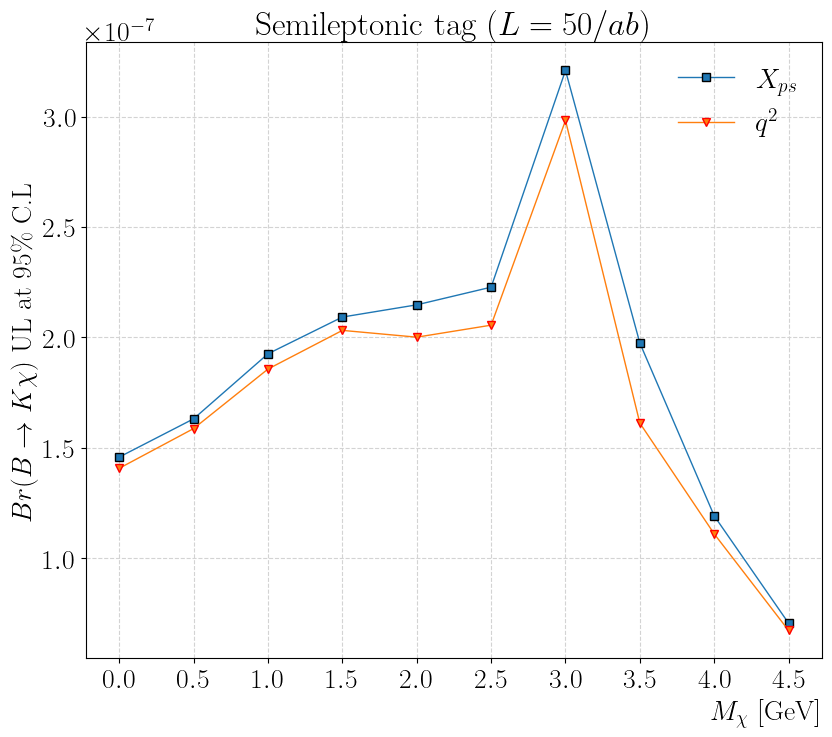

In [16]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker = 's', lw=1, ms=6, mew=1, mec='k')
ax.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker = 'v', lw=1, ms=6, mew=1, mec='r')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Median, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--', color='lightgray')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ [GeV]', loc='right')
ax.set_ylabel(r'$Br(B\to K\chi)$ UL at 95\% C.L')

x = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Semileptonic tag ($L=50/ab$)')
ax.legend([r'$X_{ps} $',  r'$q^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

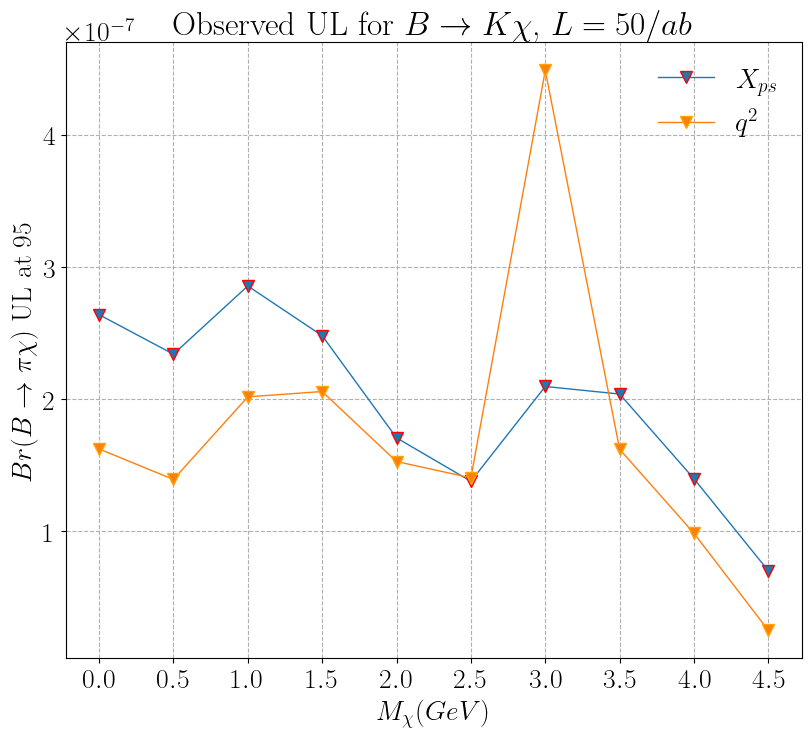

In [17]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 20, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_df.Mass, dataXps_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='r')
ax.plot(dataq2_50_df.Mass, dataq2_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Limit, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Observed UL for $B\to K \chi$'+', $L=50/ab$')
ax.legend([r'$X_{ps} $',  r'$q^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

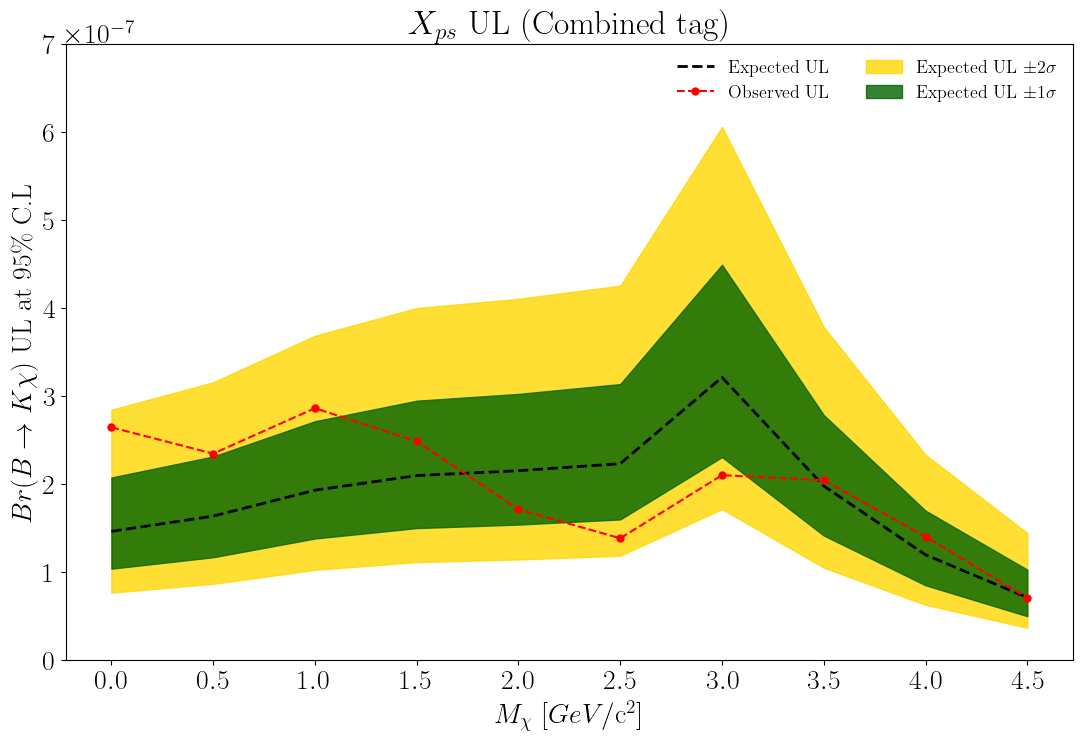

In [18]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_50_df.Mass

ax.plot(x, dataXps_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_50_df.sigmaMinus2, dataXps_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_50_df.sigmaMinus1, dataXps_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$  $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to K\chi)$ UL at 95\% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 7E-7)

plt.title(r'$X_{ps}$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

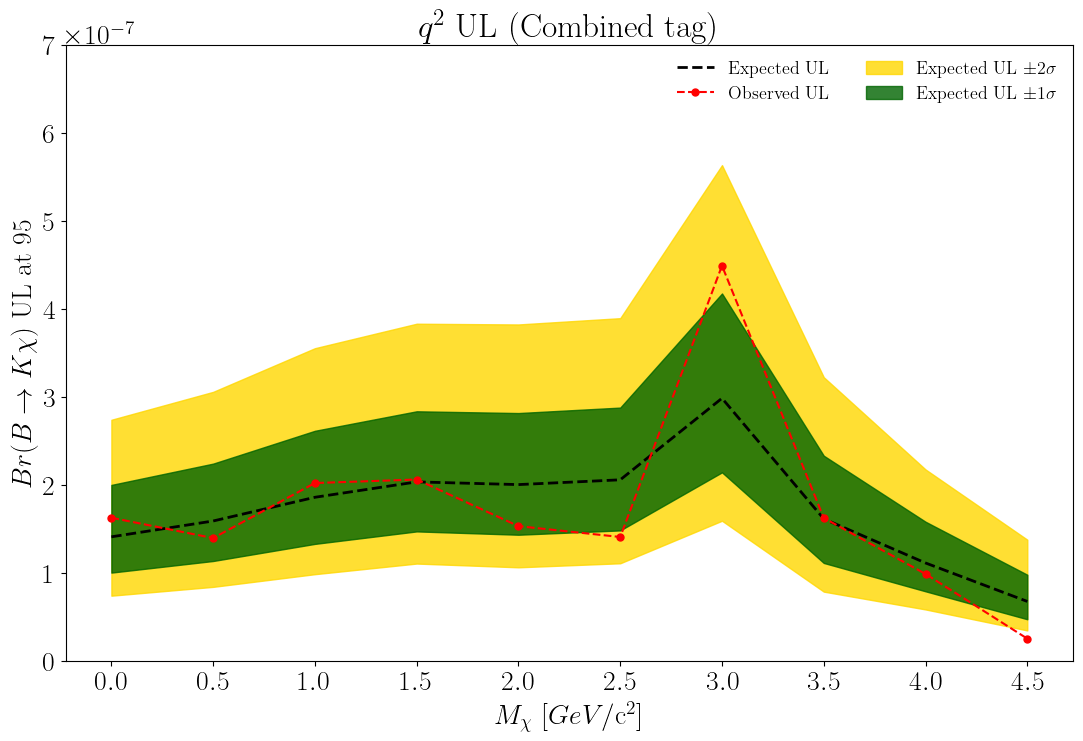

In [19]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 20, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_50_df.Mass

ax.plot(x, dataq2_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataq2_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_50_df.sigmaMinus2, dataq2_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_50_df.sigmaMinus1, dataq2_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to K\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 7E-7)

plt.title(r'$q^2$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

## Hadronic tags

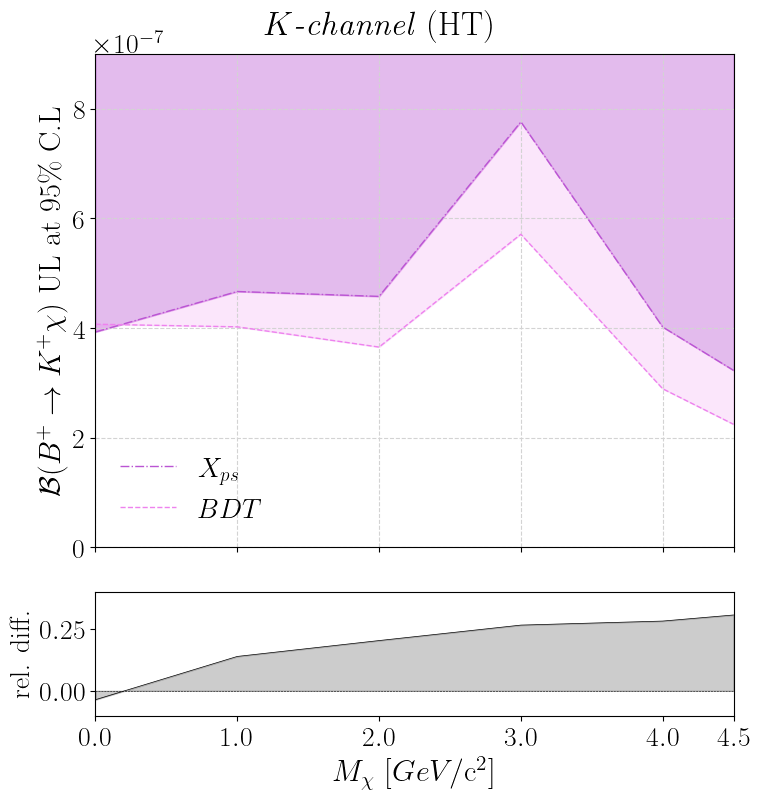

In [81]:
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


# Selecting especific columns
selected_rows = dataXps_50_Had_df.loc[::2]
final_row = dataXps_50_Had_df.iloc[[-1]]
# Select the final odd row and add it as the final column to the selected rows DataFrame
selected_rows = pd.concat([selected_rows, final_row], ignore_index=True)
x = selected_rows.Mass 

# Calculate the difference between the two sets
difference = (selected_rows.Median - dataBDT_50_Had_df.Median) / selected_rows.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(selected_rows.Mass, selected_rows.Median, linestyle='dashdot', lw=1, ms=6, mew=1, mec='mediumorchid', color='mediumorchid', label='$X_{ps}$')
ax1.fill_between(x, selected_rows.Median, 1.0E-6, color='mediumorchid', alpha=0.4)


# Plot the second set of data points
ax1.plot(dataBDT_50_Had_df.Mass, dataBDT_50_Had_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='violet', label='$BDT$')
ax1.fill_between(x, dataBDT_50_Had_df.Median, selected_rows.Median, color='violet', alpha=0.2)

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 0.9E-6)

# Plot the pull plot (difference between the two sets)
#ax2.stem(dataBDT_50_Had_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(dataBDT_50_Had_df.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-0.1, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_HadronicUL_1.png', dpi=300,  bbox_inches='tight')
plt.show()

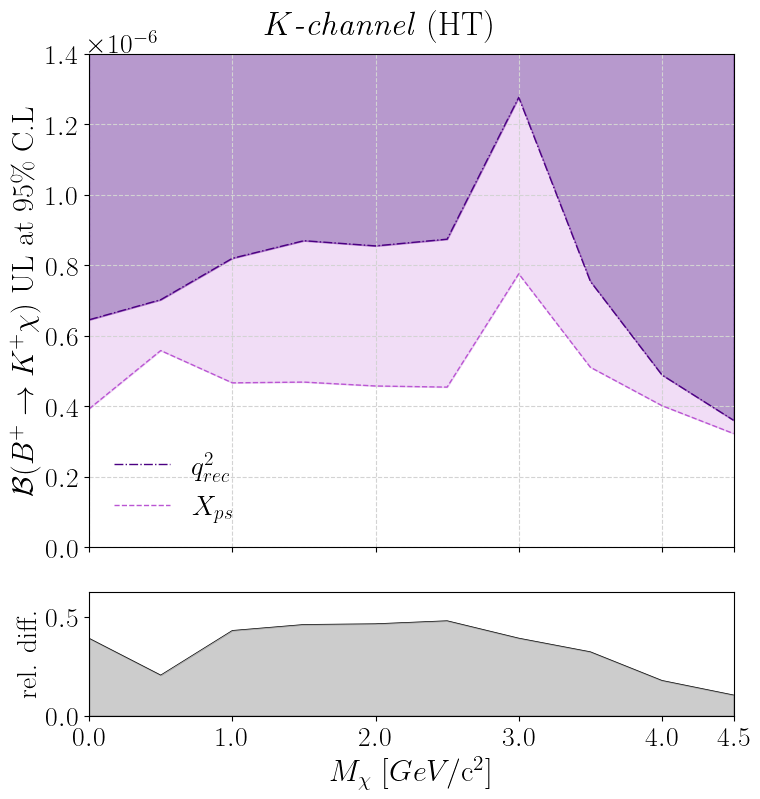

In [82]:
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values

# Selecting especific columns

x = dataq2_50_Had_df.Mass 

# Calculate the difference between the two sets
difference = (dataq2_50_Had_df.Median - dataXps_50_Had_df.Median) / dataq2_50_Had_df.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Median, linestyle='dashdot', lw=1, ms=6, mew=1, mec='indigo', color='indigo', label='$q^2_{rec}$')
ax1.fill_between(x, dataq2_50_Had_df.Median, 1.5E-6, color='indigo', alpha=0.4)

# Plot the second set of data points
#ax1.plot(selected_rows_BDT.Mass, selected_rows_BDT.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
#ax1.fill_between(x, selected_rows_BDT.Median, selected_rows_Xps.Median, color='cornflowerblue', alpha=0.2)


# Plot the second set of data points
ax1.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='mediumorchid', label='$X_{ps}$')
ax1.fill_between(x, dataXps_50_Had_df.Median, dataq2_50_Had_df.Median, color='mediumorchid', alpha=0.2)




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 1.4E-6)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(x, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_HadronicUL_2.png', dpi=300,  bbox_inches='tight')
plt.show()

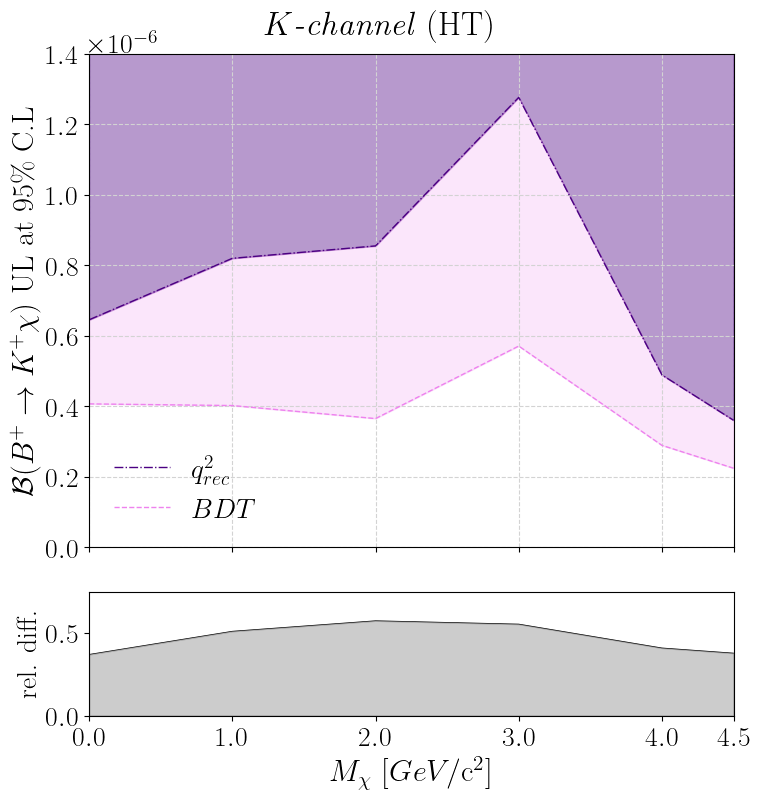

In [83]:
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values

# Selecting especific columns
selected_rows_Xps = dataXps_50_Had_df.loc[::2]
final_row_Xps = dataXps_50_Had_df.iloc[[-1]]

selected_rows_q2 = dataq2_50_Had_df.loc[::2]
final_row_q2 = dataq2_50_Had_df.iloc[[-1]]

# Select the final odd row and add it as the final column to the selected rows DataFrame
selected_rows_Xps = pd.concat([selected_rows_Xps, final_row_Xps], ignore_index=True)
selected_rows_q2 = pd.concat([selected_rows_q2, final_row_q2], ignore_index=True)

x = selected_rows_Xps.Mass 

# Calculate the difference between the two sets
difference = (selected_rows_q2.Median - dataBDT_50_Had_df.Median) / selected_rows_q2.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(selected_rows_q2.Mass, selected_rows_q2.Median, linestyle='dashdot', lw=1, ms=6, mew=1, mec='indigo', color='indigo', label='$q^2_{rec}$')
ax1.fill_between(x, selected_rows_q2.Median, 1.5E-6, color='indigo', alpha=0.4)

# Plot the second set of data points
#ax1.plot(selected_rows_BDT.Mass, selected_rows_BDT.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
#ax1.fill_between(x, selected_rows_BDT.Median, selected_rows_Xps.Median, color='cornflowerblue', alpha=0.2)


# Plot the second set of data points
ax1.plot(dataBDT_50_Had_df.Mass, dataBDT_50_Had_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='violet', mec='darkorange', label='$BDT$')
ax1.fill_between(x, dataBDT_50_Had_df.Median, selected_rows_q2.Median, color='violet', alpha=0.2)




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 1.4E-6)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(selected_rows.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_HadronicUL_3.png', dpi=300,  bbox_inches='tight')
plt.show()

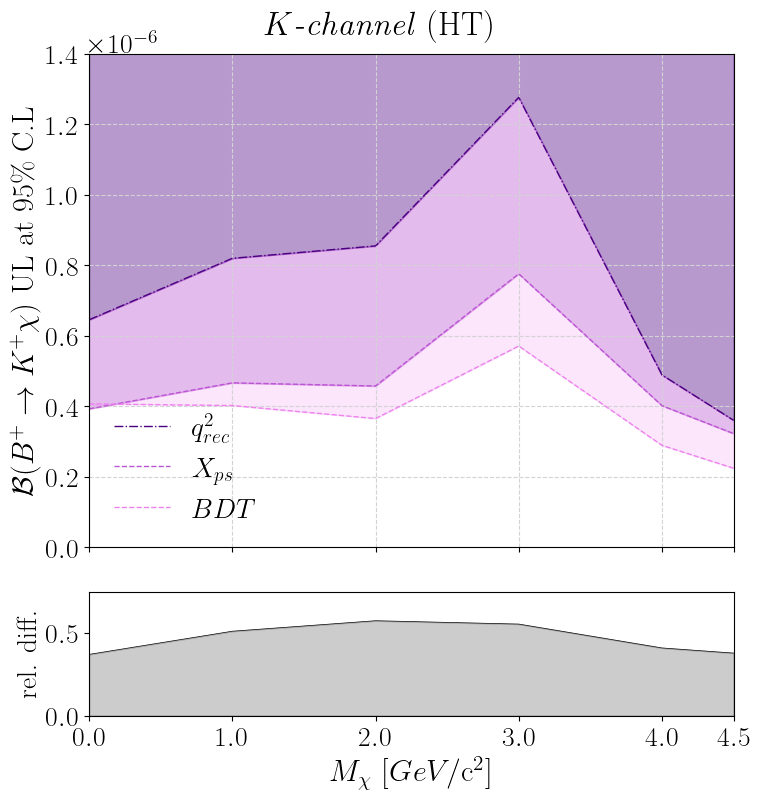

In [84]:
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
 # X-axis values

# Selecting especific columns
selected_rows_Xps = dataXps_50_Had_df.loc[::2]
final_row_Xps = dataXps_50_Had_df.iloc[[-1]]

selected_rows_q2 = dataq2_50_Had_df.loc[::2]
final_row_q2 = dataq2_50_Had_df.iloc[[-1]]

# Select the final odd row and add it as the final column to the selected rows DataFrame
selected_rows_Xps = pd.concat([selected_rows_Xps, final_row_Xps], ignore_index=True)
selected_rows_q2 = pd.concat([selected_rows_q2, final_row_q2], ignore_index=True)

x = selected_rows_Xps.Mass 

# Calculate the difference between the two sets
difference = (selected_rows_q2.Median - dataBDT_50_Had_df.Median) / selected_rows_q2.Median

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 9))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9, fontweight='bold')

# Plot the first set of data points
ax1.plot(selected_rows_q2.Mass, selected_rows_q2.Median, linestyle='dashdot', lw=1, ms=6, mew=1, mec='indigo', color='indigo', label='$q^2_{rec}$')
ax1.fill_between(x, selected_rows_q2.Median, 1.5E-6, color='indigo', alpha=0.4)

# Plot the second set of data points
#ax1.plot(selected_rows_BDT.Mass, selected_rows_BDT.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='cornflowerblue', mec='darkorange', label='$M^2_{min}$')
#ax1.fill_between(x, selected_rows_BDT.Median, selected_rows_Xps.Median, color='cornflowerblue', alpha=0.2)

ax1.plot(selected_rows_Xps.Mass, selected_rows_Xps.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='mediumorchid', label='$X_{ps}$')
ax1.fill_between(x, selected_rows_Xps.Median, selected_rows_q2.Median, color='mediumorchid', alpha=0.4)

# Plot the second set of data points
ax1.plot(dataBDT_50_Had_df.Mass, dataBDT_50_Had_df.Median, linestyle='dashed', lw=1, ms=6, mew=1, color='violet', mec='darkorange', label='$BDT$')
ax1.fill_between(x, dataBDT_50_Had_df.Median, selected_rows_Xps.Median, color='violet', alpha=0.2)




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')

# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x_ticks = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x_ticks))
ax1.set_xticks(ticks=x_ticks)

# Title and legends in the first subplot
ax1.legend(frameon=False)
ax1.legend(frameon=False, loc='lower left')  # Adjust legend position
ax1.set_xlim(min(x_ticks), max(x_ticks))
ax1.set_ylim(0, 1.4E-6)

# Plot the pull plot (difference between the two sets)
#ax2.stem(selected_rows.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
#ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
# Plot the pull plot (difference between the two sets)
ax2.plot(selected_rows.Mass, difference, color='black', linestyle='-', linewidth=0.5)
ax2.fill_between(x, difference, color='black', alpha=0.2)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.4)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.3  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(0, pull_plot_ylim)
#ax2.grid(True, which="both", ls='--', color='lightgray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'../GetLimit/ULPlots/K_HadronicUL_4.png', dpi=300,  bbox_inches='tight')
plt.show()

In [25]:
differenceHad

0    0.391504
1    0.205331
2    0.430951
3    0.461204
4    0.464857
5    0.480166
6    0.392169
7    0.323186
8    0.178214
9    0.104574
Name: Median, dtype: float64

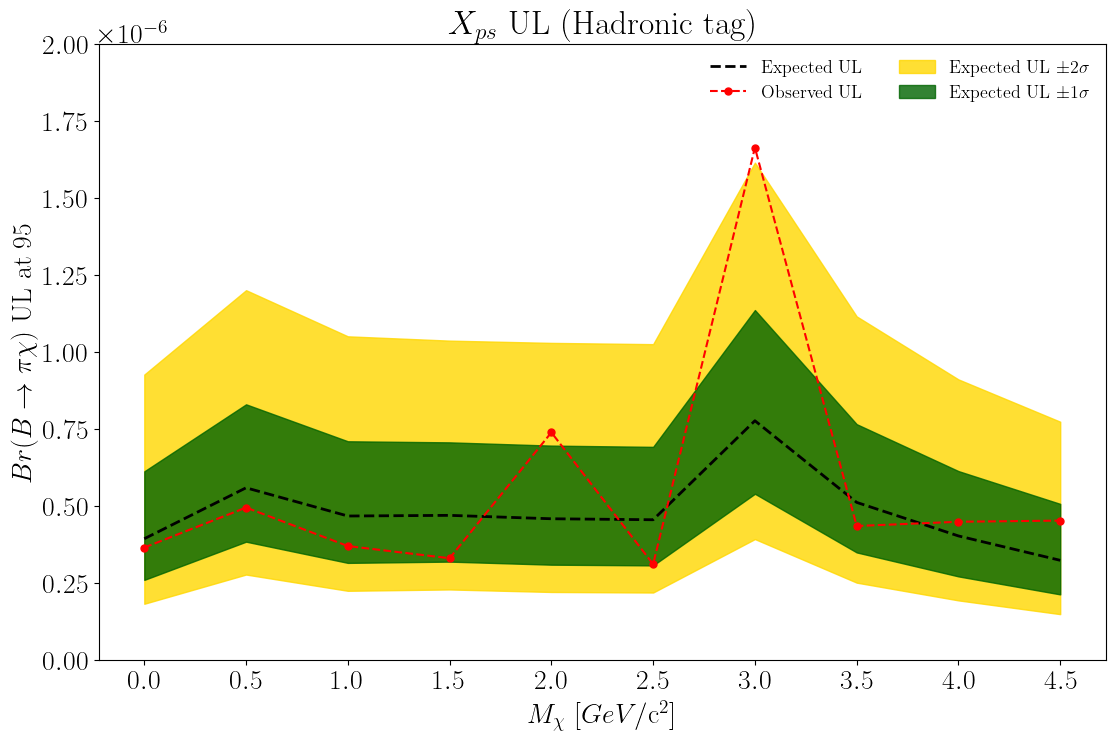

In [26]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_50_Had_df.Mass

ax.plot(x, dataXps_50_Had_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_50_Had_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_50_Had_df.sigmaMinus2, dataXps_50_Had_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_50_Had_df.sigmaMinus1, dataXps_50_Had_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2E-6)

plt.title(r'$X_{ps}$ UL (Hadronic tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

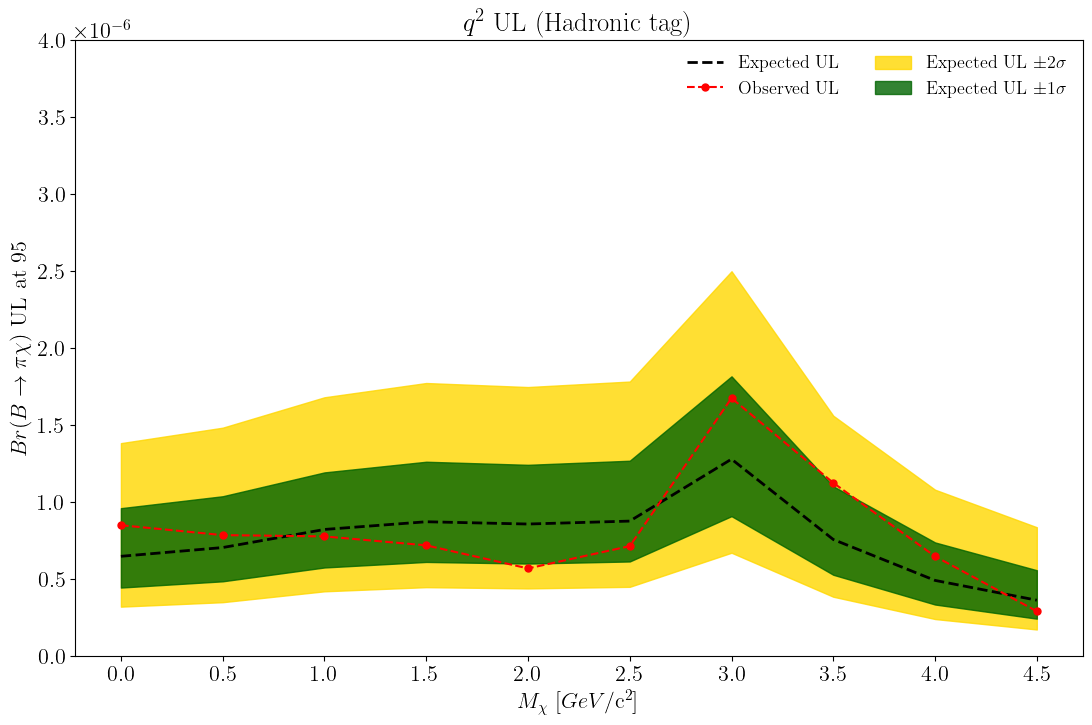

In [27]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_50_Had_df.Mass

ax.plot(x, dataq2_50_Had_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataq2_50_Had_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_50_Had_df.sigmaMinus2, dataq2_50_Had_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_50_Had_df.sigmaMinus1, dataq2_50_Had_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 4E-6)

plt.title(r'$q^2$ UL (Hadronic tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

### ULs using 362/fb 

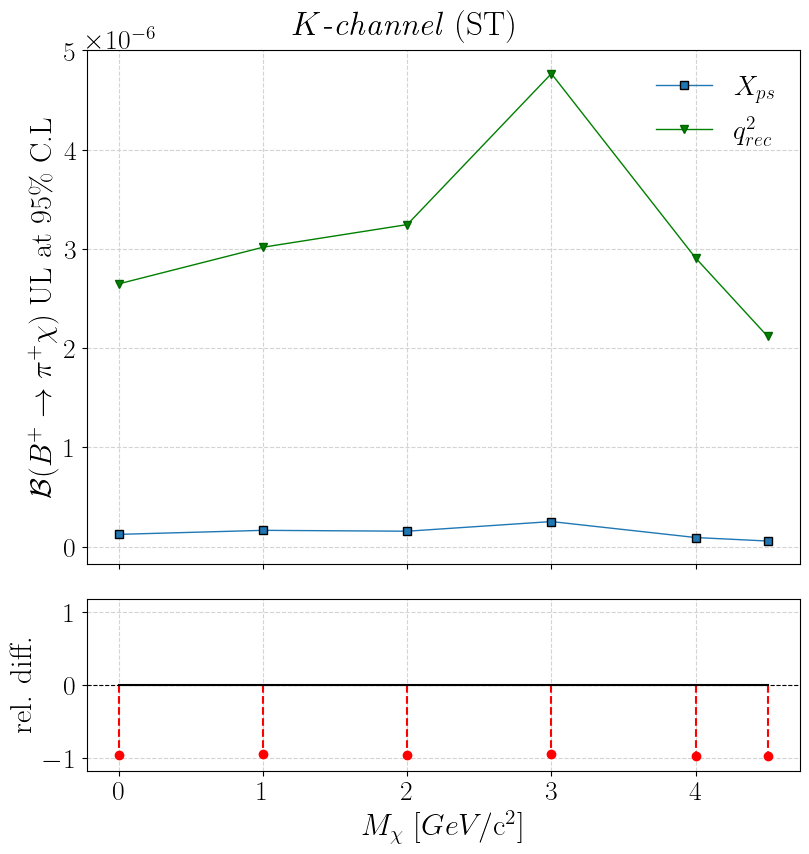

In [28]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_df.Median - dataq2_362_df.Median)
difference = (dataXps_362_df.Median - dataq2_362_df.Median)/(dataq2_362_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$K$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_df.Mass, dataXps_362_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_362_df.Mass, dataq2_362_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps} $',  r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/K_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [29]:
difference

0   -0.953788
1   -0.945996
2   -0.952510
3   -0.947255
4   -0.968870
5   -0.973949
Name: Median, dtype: float64

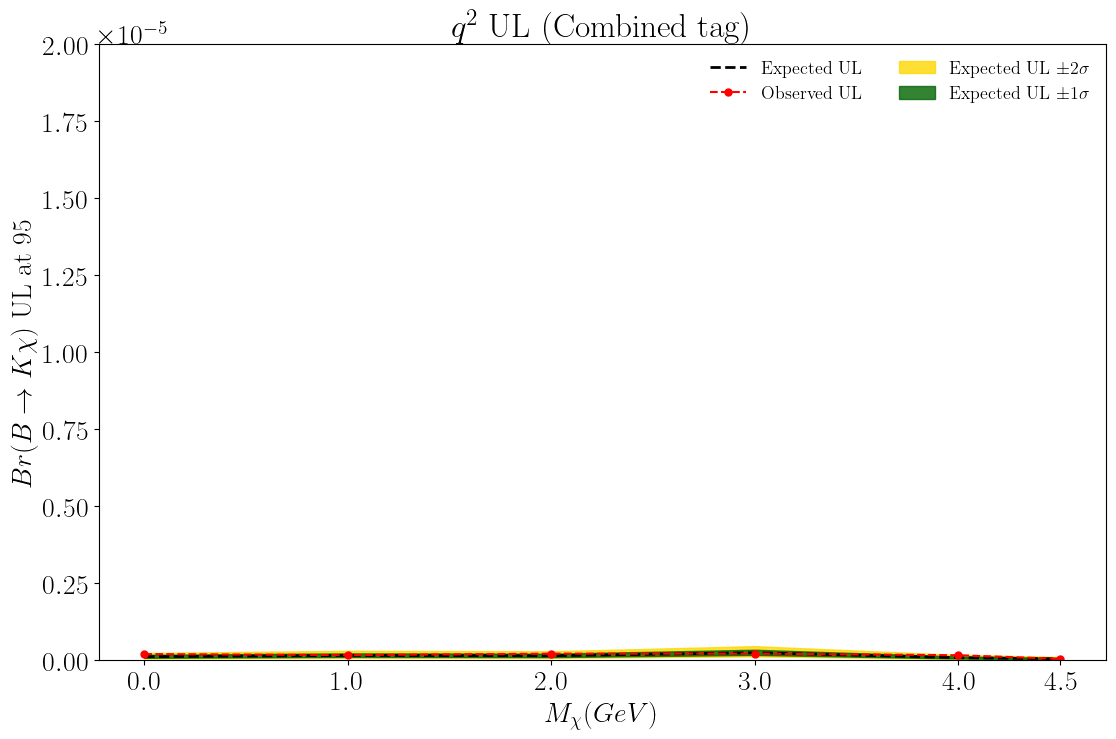

In [30]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_362_df.Mass

ax.plot(x, dataXps_362_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_362_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_362_df.sigmaMinus2, dataXps_362_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_362_df.sigmaMinus1, dataXps_362_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to K\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2E-5)

plt.title(r'$q^2$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

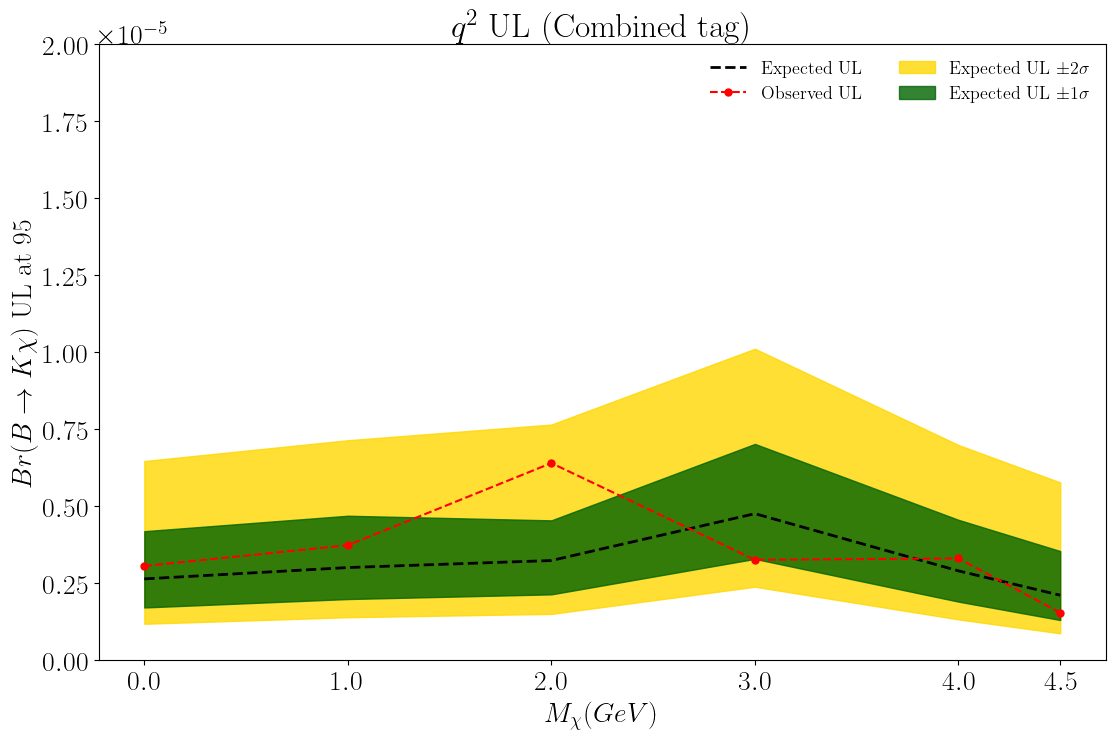

In [31]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_362_df.Mass

ax.plot(x, dataq2_362_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataq2_362_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_362_df.sigmaMinus2, dataq2_362_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_362_df.sigmaMinus1, dataq2_362_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to K\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2E-5)

plt.title(r'$q^2$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

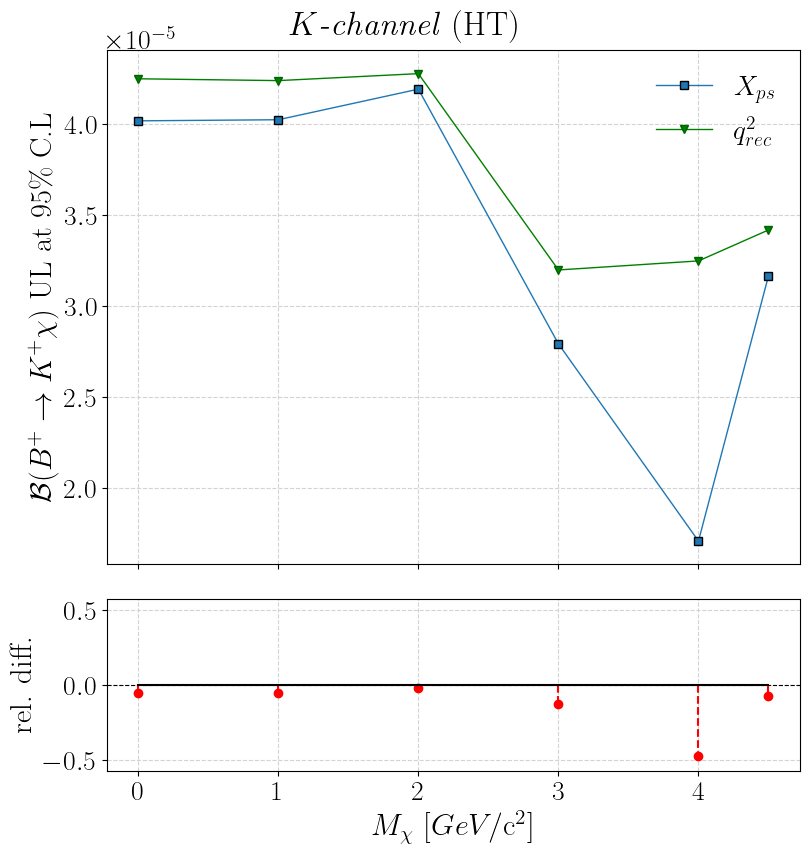

In [32]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_Had_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_Had_NoRed_df.Median - dataq2_362_Had_NoRed_df.Median)
difference = (dataXps_362_Had_NoRed_df.Median - dataq2_362_Had_NoRed_df.Median)/(dataq2_362_Had_NoRed_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$K$\textit{-channel} (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_Had_NoRed_df.Mass, dataXps_362_Had_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_362_Had_NoRed_df.Mass, dataq2_362_Had_NoRed_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps} $',  r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_Had_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/K_HadronicUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [33]:
difference

0   -0.054407
1   -0.050740
2   -0.019951
3   -0.126985
4   -0.474131
5   -0.073827
Name: Median, dtype: float64

### UL without apply the K0 and n0 (neutrons) cuts


ValueError: could not broadcast input array from shape (10,) into shape (6,)

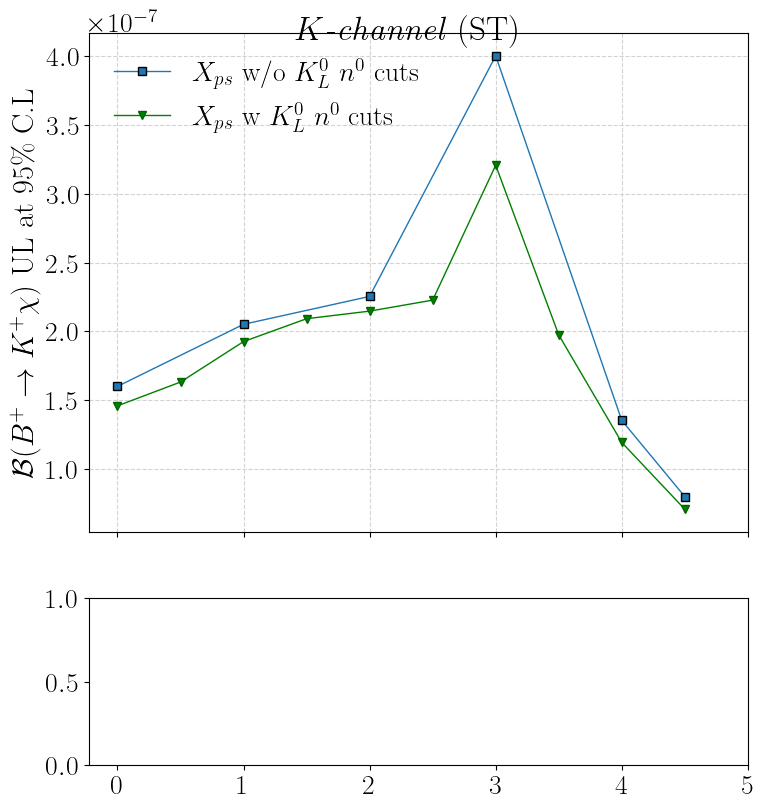

In [34]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_50_NoRed_df.Median - dataXps_50_df.Median)
difference = (dataXps_50_NoRed_df.Median - dataXps_50_df.Median)/(dataXps_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$K$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_NoRed_df.Mass, dataXps_50_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps}$ w/o $K^0_L$ $n^0$ cuts',  r'$X_{ps}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
difference

0    0.097041
1    0.065165
2    0.049767
3    0.248079
4    0.134422
5    0.130062
Name: Median, dtype: float64

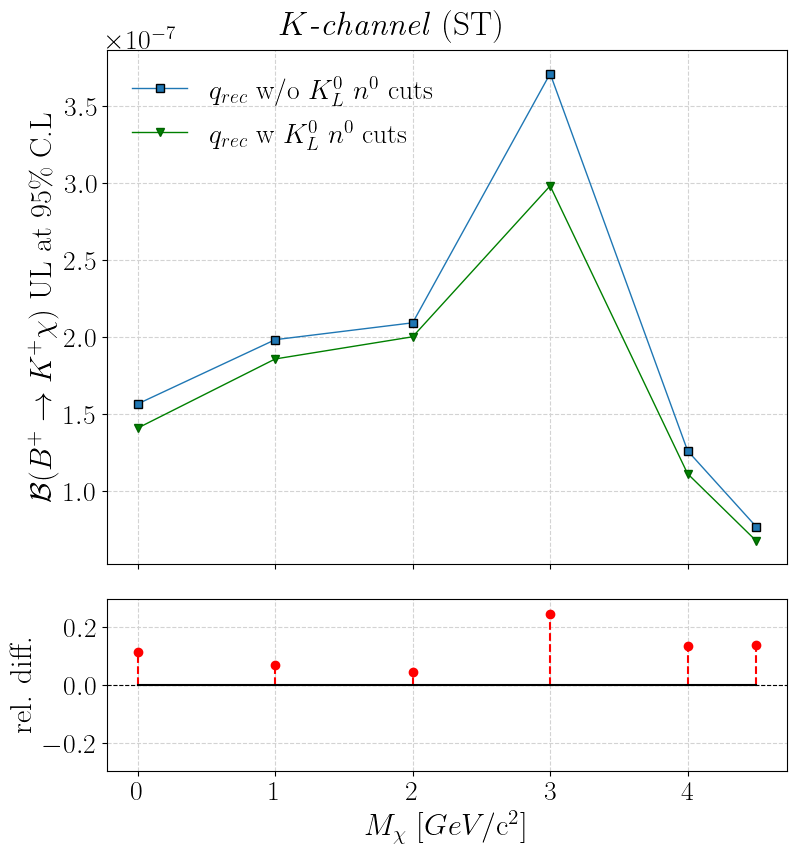

In [ ]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataq2_50_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataq2_50_NoRed_df.Median - dataq2_50_df.Median)
difference = (dataq2_50_NoRed_df.Median - dataq2_50_df.Median)/(dataq2_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$K$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataq2_50_NoRed_df.Mass, dataq2_50_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$q_{rec}$ w/o $K^0_L$ $n^0$ cuts', r'$q_{rec}$ w $K^0_L$ $n^0$ cuts' ], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataq2_50_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
difference

0    0.111551
1    0.067510
2    0.045403
3    0.244624
4    0.134291
5    0.136827
Name: Median, dtype: float64

### Hadronic tags 

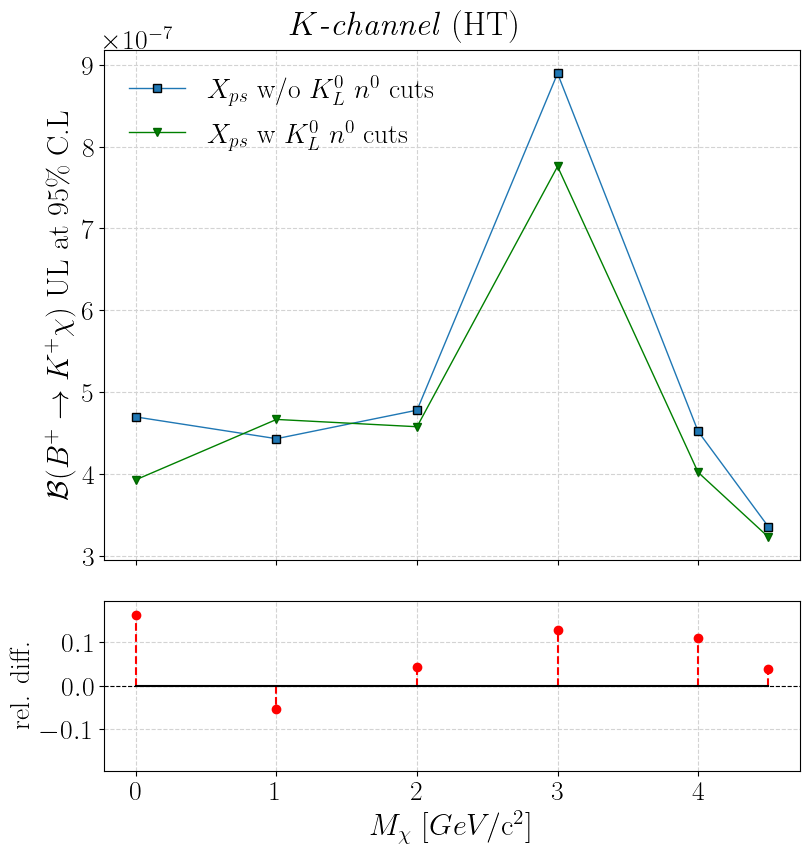

In [ ]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceHad = (dataXps_50_NoRed_Had_df.Median - dataXps_50_Had_df.Median)
differenceHad = (dataXps_50_NoRed_Had_df.Median - dataXps_50_Had_df.Median)/(dataXps_50_NoRed_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_NoRed_Had_df.Mass, dataXps_50_NoRed_Had_df.Median,  marker='s',lw=1, ms=6, mew=1, mec='k')


# Plot the second set of data points
ax1.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median,  marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$X_{ps}$ w/o $K^0_L$ $n^0$ cuts', r'$X_{ps}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_Had_df.Mass, differenceHad, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceHad)), abs(max(differenceHad))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
differenceHad

0    0.163558
1   -0.053180
2    0.042373
3    0.127860
4    0.110743
5    0.037734
Name: Median, dtype: float64

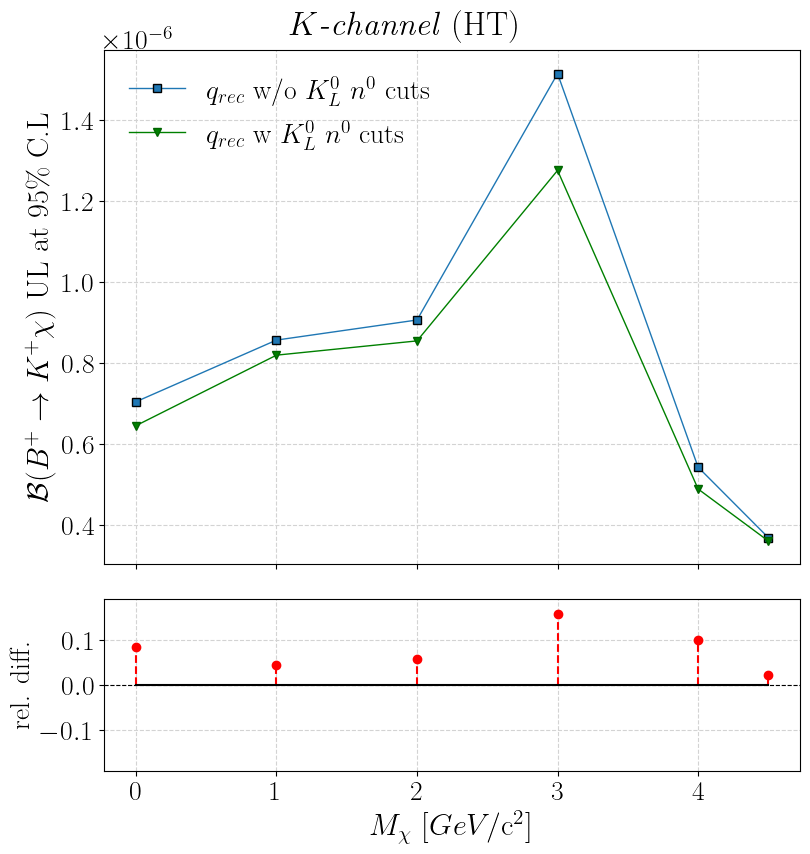

In [ ]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataq2_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceHad = (dataq2_50_NoRed_Had_df.Median - dataq2_50_Had_df.Median)
differenceHad = (dataq2_50_NoRed_Had_df.Median - dataq2_50_Had_df.Median)/(dataq2_50_NoRed_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataq2_50_NoRed_Had_df.Mass, dataq2_50_NoRed_Had_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Median,marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$q_{rec}$ w/o $K^0_L$ $n^0$ cuts', r'$q_{rec}$ w $K^0_L$ $n^0$ cuts' ], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataq2_50_Had_df.Mass, differenceHad, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceHad)), abs(max(differenceHad))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
differenceHad

0    0.083991
1    0.043488
2    0.056972
3    0.157844
4    0.099370
5    0.022424
Name: Median, dtype: float64

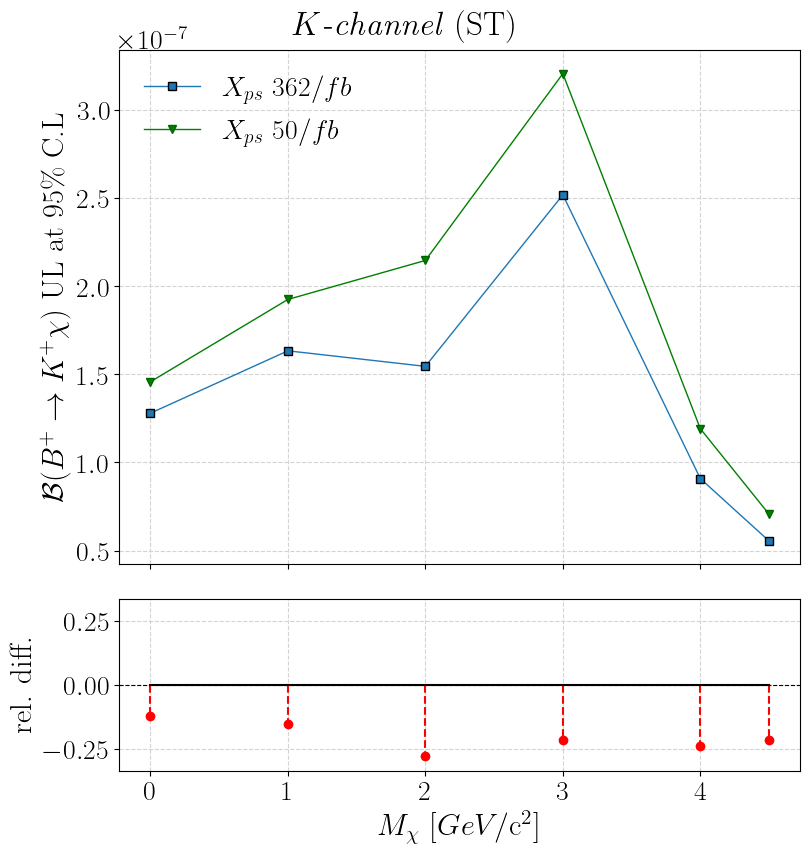

In [ ]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_df.Median - dataXps_50_df.Median)
difference = (dataXps_362_df.Median - dataXps_50_df.Median)/(dataXps_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$K$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_df.Mass, dataXps_362_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps}$  $362/fb$',  r'$X_{ps}$ $50/fb$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
difference

0   -0.122373
1   -0.151500
2   -0.280102
3   -0.214604
4   -0.237734
5   -0.215499
Name: Median, dtype: float64

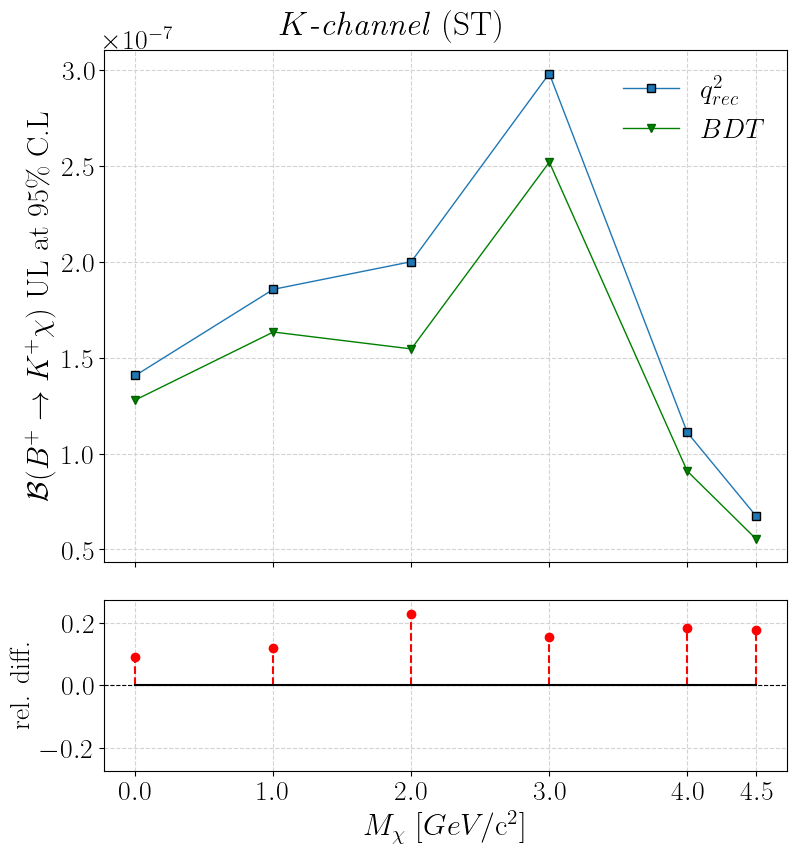

In [ ]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataBDT_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceBDT = (dataq2_50_df.Median - dataBDT_50_df.Median)
differenceBDT = (dataq2_50_df.Median - dataBDT_50_df.Median)/(dataq2_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$K$\textit{-channel}  (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataBDT_50_df.Mass, dataBDT_50_df.Median,marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$q^2_{rec}$', r'$BDT$' ], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataBDT_50_df.Mass, differenceBDT, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceBDT)), abs(max(differenceBDT))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
differenceBDT

0    0.090741
1    0.119908
2    0.227420
3    0.155009
4    0.181790
5    0.177239
Name: Median, dtype: float64

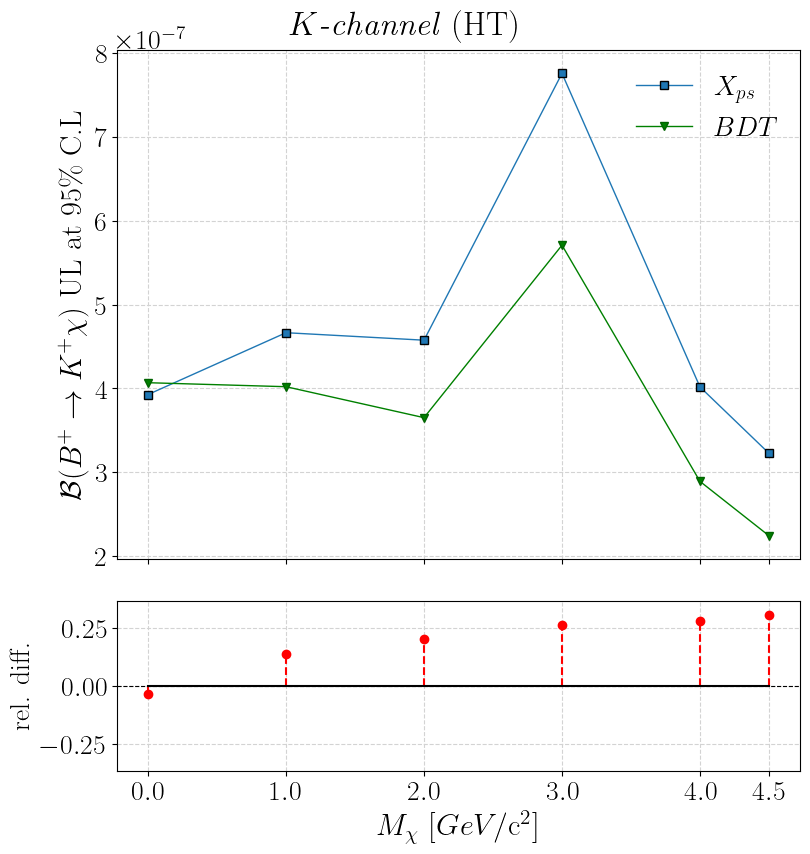

In [ ]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataBDT_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceBDT = (dataXps_50_Had_df.Median - dataBDT_50_Had_df.Median)
differenceBDT = (dataXps_50_Had_df.Median - dataBDT_50_Had_df.Median)/(dataXps_50_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$K$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataBDT_50_Had_df.Mass, dataBDT_50_Had_df.Median,marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to K^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 4.5]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$X_{ps}$', r'$BDT$' ], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataBDT_50_Had_df.Mass, differenceBDT, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceBDT)), abs(max(differenceBDT))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [ ]:
differenceBDT

0   -0.035908
1    0.138113
2    0.201991
3    0.264186
4    0.280417
5    0.304875
Name: Median, dtype: float64